# Capstone Module 2
Dataset             :  New York City TLC Trip Record </br>
Disusun Oleh    :  Roberto Benedict </br>
Kelas                 :  JCDSOL-013(B)

In [1592]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from scipy.stats import normaltest, chi2_contingency, mannwhitneyu, ttest_ind

# Ignore warnings for better presentation
import warnings
warnings.filterwarnings("ignore")

# A. Latar Belakang
Taxi & Limousine Commission New York merupakan agensi pemerintah di bidang transportation service provider kota New York. Agensi tersebut ingin merekrut seorang *data scientist* untuk melihat perilaku atau behaviour dari pelanggan berupa penumpang taxi dan kendaraan for-hire. Kesediaan armada dan agensi untuk menjawab permintaan yang memiliki pola tertentu dengan memanfaatkan strategi marketing dan operasional logistik Perusahaan adalah hal penting untuk memaksimalkan servis transportasi untuk kota New York.


# B. Pernyataan Masalah, Tujuan, dan Stakeholders
## Pernyataan Masalah
1. Terdapat pola perilaku pelanggan tertentu yang menyebabkan kurang atau optimalnya pendapatan yang diperoleh.
2. Kesediaan armada dalam menjawab permintaan pelanggan pada waktu, tempat, dan rute populer adalah hal yang krusial dalam penyediaan servis transportasi.

## Tujuan
Sebagai *data scientist*, adapun pertanyaan yang penting untuk dijawab agar dapat menghasilkan rekomendasi bagi TLC New York City demi kepentingan stakeholder lainnya, yaitu :
1. Bagaimana karakteristik pola perilaku pelanggan ?
2. Bagaimana karakteristik pola trip pada waktu, tempat, maupun rute ?

## Stakeholders
1. Customer / Pelanggan
2. TLC New York City
3. Driver

# C. Data
Untuk menjawab pertanyaan di atas, mari kita analisa data trip dilengkapi dengan data Taxi Zone. 
Dataset tersebut dapat diakses di sini :

* [Dataset 1 - NYC TLC Trip Record ](https://drive.google.com/drive/folders/1NYHIL-RgVPW-HONz4pdzlcbIChF-c37N)
* [Dataset 2 - NYC TLC Taxi Zone ](https://www.nyc.gov/site/tlc/about/tlc-trip-record-data.page)

**Dataset 1 - NYC TLC Trip Record**

Dataset ini berisi informasi waktu dan lokasi mulai dan akhir trip beserta biaya/tarif/tagihan, dan keterangan detail trip lainnya. <br/>Terdapat 20 kolom pada dataset Trip Data NYC TLC, yaitu :  

1. VendorID : Kode LPEP provider untuk record trip </br>(1 = Creative Mobile Technologies, LLC; 2 = VeriFone Inc.)
2. lpep_pickup_datetime : Tanggal dan waktu mulai argo
3. lpep_dropoff_datetime : Tanggal dan waktu selesai argo
4. store_and_fwd_flag : Indikator trip record yang disimpan sementara sebelum dikirim ke vendor (store and forward) karena koneksi server tidak tersedia </br>(Y = store and forward trip; N = not a store and forward trip)
5. RateCodeID : Kode tarif saat akhir trip </br>(1 = Standard rate; 2 = JFK; 3 = Newark; 4 = Nassau or Westchester; 5 = Negotiated fare; 6 = Group ride)
6. PULocationID : TLC Taxi Zone ID saat argo mulai
7. DOLocationID : TLC Taxi Zone ID saat argo selesai
8. passenger_count : Jumlah penumpang yang diinput driver
9. trip_distance : Jarak trip dalam mil berdasar argo
10. fare_amount : Time-and-distance fare atau tarif berdasar waktu dan jarak per meter dengan tambahan biaya lainnya ($0.50 dan $1 rush hour dan overnight)
11. extra : Biaya tambahan lainnya ($0.50 dan $1 rush hour dan overnight)
12. mta_tax : Pajak MTA (Metropolitan Transportation Authority) berdasar tarif argo (RateCodeID) yang digunakan
13. tip_amount : Tips kartu kredit
14. tolls_amount : Total biaya toll dalam trip
15. ehail_fee : Biaya e-hail
16. Improvement_surcharge : Biaya tambahan berdasar hailed trips saat flag drop atau saat taxi dipanggil ($0.30 improvement surcharge )
17. total_amount : Total tagihan tanpa tips cash
18. payment_type : Kode metode pembayaran </br>(1 = Credit card; 2 = Cash; 3 = No charge; 4 = Dispute; 5 = Unknown; 6 = Voided trip)
19. trip_type : Kode indikator trip apakah dispatch / penugasan atas telpon order atau street-hail / panggil di jalan </br>(1 = Street-hail; 2 = Dispatch)
20. congestion_surcharge : Biaya tambahan macet

Berikut cuplikan 5 baris dari atas dan bawah dataset Trip Data NYC TLC.

In [1593]:
df=pd.read_csv('NYC TLC Trip Record.csv',low_memory=False)
display(df.head(),df.tail())

VendorID lpep_pickup_datetime lpep_dropoff_datetime store_and_fwd_flag  \
0         2  2023-01-01 00:26:10   2023-01-01 00:37:11                  N   
1         2  2023-01-01 00:51:03   2023-01-01 00:57:49                  N   
2         2  2023-01-01 00:35:12   2023-01-01 00:41:32                  N   
3         1  2023-01-01 00:13:14   2023-01-01 00:19:03                  N   
4         1  2023-01-01 00:33:04   2023-01-01 00:39:02                  N   

   RatecodeID  PULocationID  DOLocationID  passenger_count  trip_distance  \
0         1.0           166           143              1.0           2.58   
1         1.0            24            43              1.0           1.81   
2         1.0           223           179              1.0           0.00   
3         1.0            41           238              1.0           1.30   
4         1.0            41            74              1.0           1.10   

   fare_amount  extra  mta_tax  tip_amount  tolls_amount  ehail_fee  \
0         14.9    1.0      0.5        4.03           0.0        NaN   
1         10.7    1.0      0.5        2.64           0.0        NaN   
2          7.2    1.0      0.5        1.94           0.0        NaN   
3          6.5    0.5      1.5        1.70           0.0        NaN   
4          6.0    0.5      1.5        0.00           0.0        NaN   

   improvement_surcharge  total_amount  payment_type  trip_type  \
0                    1.0         24.18           1.0        1.0   
1                    1.0         15.84           1.0        1.0   
2                    1.0         11.64           1.0        1.0   
3                    1.0         10.20           1.0        1.0   
4                    1.0          8.00           1.0        1.0   

   congestion_surcharge  
0                  2.75  
1                  0.00  
2                  0.00  
3                  0.00  
4                  0.00

VendorID lpep_pickup_datetime lpep_dropoff_datetime store_and_fwd_flag  \
68206         2  2023-01-31 22:29:00   2023-01-31 22:42:00                NaN   
68207         2  2023-01-31 22:40:00   2023-01-31 22:48:00                NaN   
68208         2  2023-01-31 23:46:00   2023-02-01 00:02:00                NaN   
68209         2  2023-01-31 23:01:00   2023-01-31 23:19:00                NaN   
68210         2  2023-01-31 23:51:00   2023-02-01 00:07:00                NaN   

       RatecodeID  PULocationID  DOLocationID  passenger_count  trip_distance  \
68206         NaN            49            62              NaN        4070.82   
68207         NaN            10           205              NaN           2.14   
68208         NaN            66            37              NaN           3.44   
68209         NaN           225           189              NaN           3.03   
68210         NaN           256           140              NaN           5.82   

       fare_amount  extra  mta_tax  tip_amount  tolls_amount  ehail_fee  \
68206        15.70    0.0      0.0        0.00           0.0        NaN   
68207         4.41    0.0      0.0        0.00           0.0        NaN   
68208        16.53    0.0      0.0        3.51           0.0        NaN   
68209        14.98    0.0      0.0        3.20           0.0        NaN   
68210        23.65    0.0      0.0        2.00           0.0        NaN   

       improvement_surcharge  total_amount  payment_type  trip_type  \
68206                    1.0         16.70           NaN        NaN   
68207                    1.0          5.41           NaN        NaN   
68208                    1.0         21.04           NaN        NaN   
68209                    1.0         19.18           NaN        NaN   
68210                    1.0         29.40           NaN        NaN   

       congestion_surcharge  
68206                   NaN  
68207                   NaN  
68208                   NaN  
68209                   NaN  
68210                   NaN

**Dataset 2 - NYC TLC Taxi Zone**

Source : https://www.nyc.gov/site/tlc/about/tlc-trip-record-data.page </br>
Direct link to csv : https://d37ci6vzurychx.cloudfront.net/misc/taxi_zone_lookup.csv

Dataset ini berisi informasi Taxi Zone. <br/>Terdapat 4 kolom pada dataset NYC TLC Taxi Zone, yaitu :  

1. LocationID : Kode lokasi Taxi Zone
2. Borough : Unit administratif di bawah state / negara bagian
3. Zone : Zona taxi
4. service_zone : Zona servis taxi

Berikut cuplikan 5 baris dari atas dan bawah dataset NYC TLC Taxi Zone.

In [1594]:
df_zone=pd.read_csv('taxi_zone_lookup.csv',low_memory=False)
display(df_zone.head(),df_zone.tail())

LocationID        Borough                     Zone service_zone
0           1            EWR           Newark Airport          EWR
1           2         Queens              Jamaica Bay    Boro Zone
2           3          Bronx  Allerton/Pelham Gardens    Boro Zone
3           4      Manhattan            Alphabet City  Yellow Zone
4           5  Staten Island            Arden Heights    Boro Zone

LocationID    Borough                Zone service_zone
260         261  Manhattan  World Trade Center  Yellow Zone
261         262  Manhattan      Yorkville East  Yellow Zone
262         263  Manhattan      Yorkville West  Yellow Zone
263         264    Unknown                 NaN          NaN
264         265        NaN      Outside of NYC          NaN

# D. Data Understanding
Sebelum masuk ke dalam bagian analisis, perlu dijabarkan informasi umum dataset melalui tahap *data understanding*. Dalam tahap ini, anomali-anomali dapat terlihat pada dataset yang tentunya perlu ditangani dalam tahapan selanjutnya, *data cleaning*. 

Pertama, mari kita lihat informasi umum dari dataset 1.

In [1595]:
print(f'Jumlah baris dan kolom di dataset 1 adalah {df.shape}')
df.info()

Jumlah baris dan kolom di dataset 1 adalah (68211, 20)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68211 entries, 0 to 68210
Data columns (total 20 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   VendorID               68211 non-null  int64  
 1   lpep_pickup_datetime   68211 non-null  object 
 2   lpep_dropoff_datetime  68211 non-null  object 
 3   store_and_fwd_flag     63887 non-null  object 
 4   RatecodeID             63887 non-null  float64
 5   PULocationID           68211 non-null  int64  
 6   DOLocationID           68211 non-null  int64  
 7   passenger_count        63887 non-null  float64
 8   trip_distance          68211 non-null  float64
 9   fare_amount            68211 non-null  float64
 10  extra                  68211 non-null  float64
 11  mta_tax                68211 non-null  float64
 12  tip_amount             68211 non-null  float64
 13  tolls_amount           68211 non-null  float64
 14 

In [1596]:
display(df.describe(), df.describe(include='object'))

VendorID    RatecodeID  PULocationID  DOLocationID  \
count  68211.000000  63887.000000  68211.000000  68211.000000   
mean       1.863028      1.117160     98.549735    138.429901   
std        0.343820      1.372913     61.244314     76.761311   
min        1.000000      1.000000      1.000000      1.000000   
25%        2.000000      1.000000     74.000000     74.000000   
50%        2.000000      1.000000     75.000000    138.000000   
75%        2.000000      1.000000    129.000000    219.000000   
max        2.000000     99.000000    265.000000    265.000000   

       passenger_count  trip_distance   fare_amount         extra  \
count     63887.000000   68211.000000  68211.000000  68211.000000   
mean          1.315870       8.114852     16.603545      0.825431   
std           0.979054     585.105955     13.470121      1.269904   
min           0.000000       0.000000    -70.000000     -2.500000   
25%           1.000000       1.110000      9.300000      0.000000   
50%           1.000000       1.850000     13.500000      0.000000   
75%           1.000000       3.210000     19.800000      1.000000   
max           9.000000  120098.840000    490.000000     12.500000   

            mta_tax    tip_amount  tolls_amount  ehail_fee  \
count  68211.000000  68211.000000  68211.000000        0.0   
mean       0.588340      2.139012      0.169627        NaN   
std        0.385819      3.052710      1.099789        NaN   
min       -0.500000    -10.500000      0.000000        NaN   
25%        0.500000      0.000000      0.000000        NaN   
50%        0.500000      1.600000      0.000000        NaN   
75%        0.500000      3.330000      0.000000        NaN   
max        2.750000    222.220000     36.050000        NaN   

       improvement_surcharge  total_amount  payment_type     trip_type  \
count           68211.000000  68211.000000  63887.000000  63877.000000   
mean                0.951625     21.789377      1.373613      1.021933   
std                 0.196875     15.457115      0.508039      0.146465   
min                -1.000000    -71.500000      1.000000      1.000000   
25%                 1.000000     12.900000      1.000000      1.000000   
50%                 1.000000     17.900000      1.000000      1.000000   
75%                 1.000000     26.150000      2.000000      1.000000   
max                 1.000000    491.000000      5.000000      2.000000   

       congestion_surcharge  
count          63887.000000  
mean               0.726748  
std                1.212836  
min               -2.750000  
25%                0.000000  
50%                0.000000  
75%                2.750000  
max                2.750000

lpep_pickup_datetime lpep_dropoff_datetime store_and_fwd_flag
count                 68211                 68211              63887
unique                66575                 66519                  2
top     2023-01-09 09:08:00   2023-01-09 00:00:00                  N
freq                      4                     6              63579

In [1597]:
pd.set_option('display.max_colwidth', None)
# data unique di tiap kolom
listItem = []
for col in df.columns :
    listItem.append( [col, df[col].nunique(), df[col].unique()])

dfDesc = pd.DataFrame(columns=['Column Name', 'Number of Unique', 'Unique Sample'], data=listItem)
dfDesc

Column Name  Number of Unique  \
0                VendorID                 2   
1    lpep_pickup_datetime             66575   
2   lpep_dropoff_datetime             66519   
3      store_and_fwd_flag                 2   
4              RatecodeID                 6   
5            PULocationID               226   
6            DOLocationID               249   
7         passenger_count                10   
8           trip_distance              1870   
9             fare_amount              2553   
10                  extra                16   
11                mta_tax                 6   
12             tip_amount              1492   
13           tolls_amount                26   
14              ehail_fee                 0   
15  improvement_surcharge                 5   
16           total_amount              4670   
17           payment_type                 5   
18              trip_type                 2   
19   congestion_surcharge                 4   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                Unique Sample  
0                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                 

Secara umum, terlihat bahwa:
* Dataset 1 memiliki 20 kolom dan 68211 baris
* Kolom `store_and_fwd_flag`, `RatecodeID`, `passenger_count`, `ehail_fee`, `payment_type`, `trip_type` dan `congestion_surcharge` memiliki data kosong yang diwakili dengan data NaN. Kolom numerikal atau yang melebihi batas display akan ditinjau lebih lanjut.
* Kolom `ehail_fee` hanya mengandung data NaN dan perlu dibuang.
* Kolom yang memiliki data tipe object seperti diduga, yaitu datetime dan flag non numerik.
* Terdapat kolom-kolom numerikal dengan nilai negatif, yaitu pada `fare_amount`, `extra`, `mta_tax`, `tip_amount`, `improvement_surcharge`, `total_amount`, dan `congestion_surcharge`. Perlu ditinjau lebih lanjut.
* Kolom `trip_distance` memiliki range data yang sangat besar walaupun dalam satuan mil, perlu ditinjau lebih lanjut.
* Kolom `RatecodeID` ada nilai diluar batas yang ditentukan.

Lalu, mari kita lihat informasi umum dari dataset 2 tentang zona taxi.

In [1598]:
print(f'Jumlah baris dan kolom di dataset 1 adalah {df_zone.shape}')
df_zone.info()

Jumlah baris dan kolom di dataset 1 adalah (265, 4)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 265 entries, 0 to 264
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   LocationID    265 non-null    int64 
 1   Borough       264 non-null    object
 2   Zone          264 non-null    object
 3   service_zone  263 non-null    object
dtypes: int64(1), object(3)
memory usage: 8.4+ KB


In [1599]:
display(df_zone.describe(), df_zone.describe(include='object'))

LocationID
count  265.000000
mean   133.000000
std     76.643112
min      1.000000
25%     67.000000
50%    133.000000
75%    199.000000
max    265.000000

Borough                                           Zone service_zone
count      264                                            264          263
unique       7                                            261            4
top     Queens  Governor's Island/Ellis Island/Liberty Island    Boro Zone
freq        69                                              3          205

In [1600]:
pd.set_option('display.max_colwidth', None)
# data unique di tiap kolom
listItem = []
for col in df_zone.columns :
    listItem.append( [col, df_zone[col].nunique(), df_zone[col].unique()])

dfZoneDesc = pd.DataFrame(columns=['Column Name', 'Number of Unique', 'Unique Sample'], data=listItem)
dfZoneDesc

Column Name  Number of Unique  \
0    LocationID               265   
1       Borough                 7   
2          Zone               261   
3  service_zone                 4   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                   Unique Sample  
0                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                  [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, ...]  
1                                                                                                                                                                                                                                                                                                                                                                                                                                   

Secara umum, terlihat bahwa:
* Dataset 2 memiliki 4 kolom dan 265 baris
* Kolom `Borough` dan `service_zone` memiliki data kosong yang diwakili dengan data NaN. Kolom numerikal atau yang melebihi batas display akan ditinjau lebih lanjut.
* Kolom yang memiliki data tipe object seperti diduga, yaitu `Borough`, `Zone`, dan `service_zone`.

# E. Data Cleaning
Pada tahap ini, semua penanganan anomali yang dilakukan disertai dengan justifikasi *domain knowledge* atau statistik.

**Dataset 1**

**Data Duplicate**

In [1601]:
df.duplicated().sum()

0

Secara keseluruhan tidak ada duplicate. Sekarang cek kolom detail trip yang bukan nominal harga, tarif, atau uang.

In [1602]:
# keep = False, agar dapat melihat entri yang dinilai duplikat
col = ['VendorID','lpep_pickup_datetime','lpep_dropoff_datetime','store_and_fwd_flag','RatecodeID','PULocationID','DOLocationID','passenger_count','trip_distance','payment_type','trip_type']
dupSuspect = df.duplicated(subset=col, keep=False)
print('Banyak baris duplicate :', df.duplicated(subset=col).sum())

display(df[dupSuspect].head(4), df[dupSuspect].tail(4), df[dupSuspect][df['tip_amount']!=0].head(2))
print('Perbedaan :')
display(df[dupSuspect].head(4).drop(columns=col), df[dupSuspect].tail(4).drop(columns=col))
display(df[dupSuspect][df['tip_amount']!=0].head(2).drop(columns=col), df[dupSuspect][df['congestion_surcharge']!=0].head(2).drop(columns=col))


Banyak baris duplicate : 174


VendorID lpep_pickup_datetime lpep_dropoff_datetime store_and_fwd_flag  \
662         2  2023-01-01 14:58:13   2023-01-01 14:58:39                  N   
663         2  2023-01-01 14:58:13   2023-01-01 14:58:39                  N   
898         2  2023-01-01 17:24:52   2023-01-01 17:25:12                  N   
899         2  2023-01-01 17:24:52   2023-01-01 17:25:12                  N   

     RatecodeID  PULocationID  DOLocationID  passenger_count  trip_distance  \
662         1.0            75            74              2.0           0.17   
663         1.0            75            74              2.0           0.17   
898         1.0           193           193              1.0           0.00   
899         1.0           193           193              1.0           0.00   

     fare_amount  extra  mta_tax  tip_amount  tolls_amount  ehail_fee  \
662         -3.0    0.0     -0.5         0.0           0.0        NaN   
663          3.0    0.0      0.5         0.0           0.0        NaN   
898         -3.0    0.0     -0.5         0.0           0.0        NaN   
899          3.0    0.0      0.5         0.0           0.0        NaN   

     improvement_surcharge  total_amount  payment_type  trip_type  \
662                   -1.0          -4.5           3.0        1.0   
663                    1.0           4.5           3.0        1.0   
898                   -1.0          -4.5           4.0        1.0   
899                    1.0           4.5           4.0        1.0   

     congestion_surcharge  
662                   0.0  
663                   0.0  
898                   0.0  
899                   0.0

VendorID lpep_pickup_datetime lpep_dropoff_datetime store_and_fwd_flag  \
63807         2  2023-01-31 22:44:16   2023-01-31 22:45:18                  N   
63808         2  2023-01-31 22:44:16   2023-01-31 22:45:18                  N   
63868         2  2023-01-31 23:44:44   2023-01-31 23:45:15                  N   
63869         2  2023-01-31 23:44:44   2023-01-31 23:45:15                  N   

       RatecodeID  PULocationID  DOLocationID  passenger_count  trip_distance  \
63807         1.0           256           256              1.0           0.15   
63808         1.0           256           256              1.0           0.15   
63868         5.0           264           264              1.0           0.00   
63869         5.0           264           264              1.0           0.00   

       fare_amount  extra  mta_tax  tip_amount  tolls_amount  ehail_fee  \
63807         -3.7   -1.0     -0.5         0.0           0.0        NaN   
63808          3.7    1.0      0.5         0.0           0.0        NaN   
63868        -10.0    0.0      0.0         0.0           0.0        NaN   
63869         10.0    0.0      0.0         0.0           0.0        NaN   

       improvement_surcharge  total_amount  payment_type  trip_type  \
63807                   -1.0          -6.2           3.0        1.0   
63808                    1.0           6.2           3.0        1.0   
63868                   -1.0         -11.0           4.0        2.0   
63869                    1.0          11.0           4.0        2.0   

       congestion_surcharge  
63807                   0.0  
63808                   0.0  
63868                   0.0  
63869                   0.0

VendorID lpep_pickup_datetime lpep_dropoff_datetime store_and_fwd_flag  \
3409         2  2023-01-03 11:43:10   2023-01-03 11:43:25                  N   
3410         2  2023-01-03 11:43:10   2023-01-03 11:43:25                  N   

      RatecodeID  PULocationID  DOLocationID  passenger_count  trip_distance  \
3409         1.0           193           193              1.0            0.0   
3410         1.0           193           193              1.0            0.0   

      fare_amount  extra  mta_tax  tip_amount  tolls_amount  ehail_fee  \
3409         -3.0    0.0     -0.5        -0.9           0.0        NaN   
3410          3.0    0.0      0.5         0.9           0.0        NaN   

      improvement_surcharge  total_amount  payment_type  trip_type  \
3409                   -1.0          -5.4           3.0        1.0   
3410                    1.0           5.4           3.0        1.0   

      congestion_surcharge  
3409                   0.0  
3410                   0.0

Perbedaan :


fare_amount  extra  mta_tax  tip_amount  tolls_amount  ehail_fee  \
662         -3.0    0.0     -0.5         0.0           0.0        NaN   
663          3.0    0.0      0.5         0.0           0.0        NaN   
898         -3.0    0.0     -0.5         0.0           0.0        NaN   
899          3.0    0.0      0.5         0.0           0.0        NaN   

     improvement_surcharge  total_amount  congestion_surcharge  
662                   -1.0          -4.5                   0.0  
663                    1.0           4.5                   0.0  
898                   -1.0          -4.5                   0.0  
899                    1.0           4.5                   0.0

fare_amount  extra  mta_tax  tip_amount  tolls_amount  ehail_fee  \
63807         -3.7   -1.0     -0.5         0.0           0.0        NaN   
63808          3.7    1.0      0.5         0.0           0.0        NaN   
63868        -10.0    0.0      0.0         0.0           0.0        NaN   
63869         10.0    0.0      0.0         0.0           0.0        NaN   

       improvement_surcharge  total_amount  congestion_surcharge  
63807                   -1.0          -6.2                   0.0  
63808                    1.0           6.2                   0.0  
63868                   -1.0         -11.0                   0.0  
63869                    1.0          11.0                   0.0

fare_amount  extra  mta_tax  tip_amount  tolls_amount  ehail_fee  \
3409         -3.0    0.0     -0.5        -0.9           0.0        NaN   
3410          3.0    0.0      0.5         0.9           0.0        NaN   

      improvement_surcharge  total_amount  congestion_surcharge  
3409                   -1.0          -5.4                   0.0  
3410                    1.0           5.4                   0.0

fare_amount  extra  mta_tax  tip_amount  tolls_amount  ehail_fee  \
33359         -7.9   -2.5     -0.5         0.0           0.0        NaN   
33360          7.9    2.5      0.5         0.0           0.0        NaN   

       improvement_surcharge  total_amount  congestion_surcharge  
33359                   -1.0        -14.65                 -2.75  
33360                    1.0         14.65                  2.75

Kolom-kolom dengan numerikal nilai negatif, yaitu pada `fare_amount`, `extra`, `mta_tax`, `tip_amount`, `improvement_surcharge`, `total_amount`, dan `congestion_surcharge`, nampak bahwa baris-baris duplikat mempunyai detail trip yang sama selain yang nilai negatif dan nilai negatif terlihat memiliki nominal magnitude yang sama. Oleh karena itu, duplicate tersebut dapat didrop. Hal ini dikarenakan kalaupun metode cleaning untuk angka negatif dilakukan, nominal akan dibuat absolute pada angka-angka tersebut berhubung nilai-nilai ini tidak masuk akal jika negatif untuk nominal uang yang bukan dalam konteks akuntansi. Dan jika angka dibuat absolute, maka angka-angka tersebut akan menjadi duplicated sepenuhnya. 

In [1603]:
col = ['VendorID','lpep_pickup_datetime','lpep_dropoff_datetime','store_and_fwd_flag','RatecodeID','PULocationID','DOLocationID','passenger_count','trip_distance','payment_type','trip_type']
df.drop_duplicates(keep='last',subset=col, inplace=True)

In [1604]:
print('Banyak baris duplicate :', df.duplicated(subset=col).sum())

Banyak baris duplicate : 0


**Missing Values**

In [1605]:
df.isna().sum()

VendorID                     0
lpep_pickup_datetime         0
lpep_dropoff_datetime        0
store_and_fwd_flag        4324
RatecodeID                4324
PULocationID                 0
DOLocationID                 0
passenger_count           4324
trip_distance                0
fare_amount                  0
extra                        0
mta_tax                      0
tip_amount                   0
tolls_amount                 0
ehail_fee                68037
improvement_surcharge        0
total_amount                 0
payment_type              4324
trip_type                 4334
congestion_surcharge      4324
dtype: int64

<Axes: >

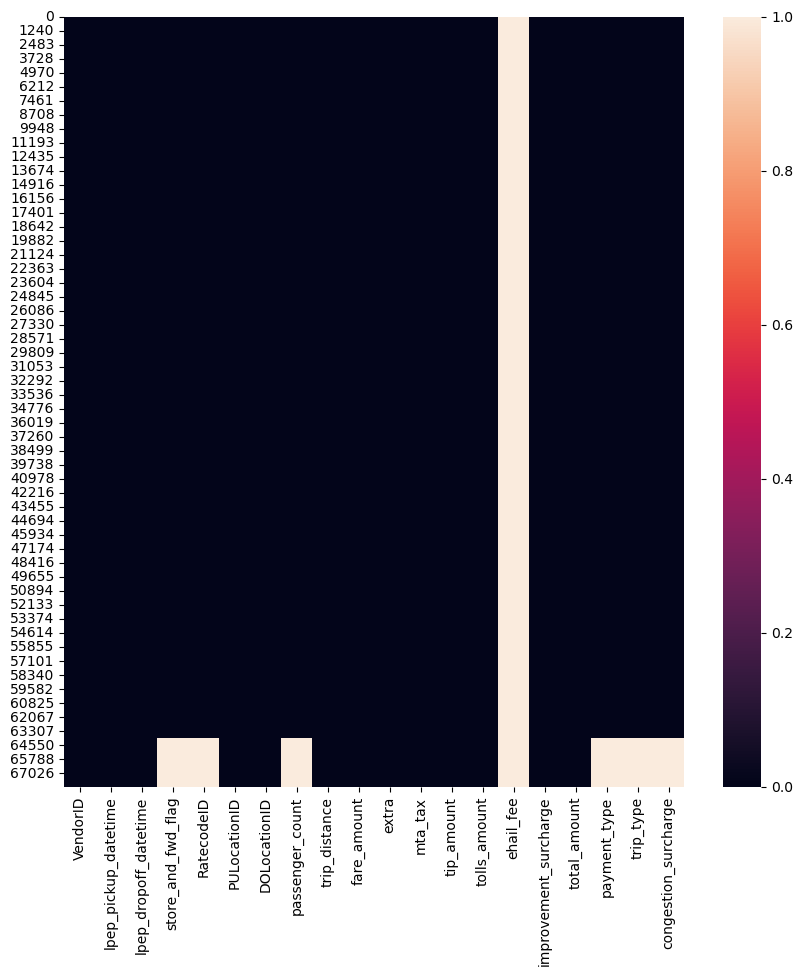

In [1606]:
# Sebaran missing value pada data menggunakan heatmap
plt.figure(figsize=(10,10))
sns.heatmap(df.isna())

In [1607]:
print('length df : ', len(df), ', Banyak NaN kolom ehail_fee : ', len(df[df['ehail_fee'].isna()]))

length df :  68037 , Banyak NaN kolom ehail_fee :  68037


Karena, kolom `ehail_fee` hanya mengandung NaN, akan didrop

In [1608]:
df.drop('ehail_fee', axis=1, inplace=True)

Terdapat persis 4324 NaN pada kolom `store_and_fwd_flag`, `RatecodeID `, `passenger_count`, `payment_type`, `trip_type`, dan `congestion_surcharge`. Hal ini menandakan error yang saling tergantung. Dari variable tersebut, terlihat bahwa kosongnya detil trip yang lain dapat disebabkan oleh store_and_fwd_flag. Karena flag tersebut berhubung dengan penyimpanan data, maka nilai NaN pada flag ini menjadi indikasi terjadinya error saat penyimpanan yang mengakibatkan tidak tersimpannya beberapa data.

Mari pastikan bahwa NaN terhubung secara langsung, dimana jika `store_and_fwd_flag` NaN, maka semua NaN

In [1609]:
len(df[df['store_and_fwd_flag'].isna() & df['RatecodeID'].isna() & df['passenger_count'].isna() & df['payment_type'].isna() & df['trip_type'].isna() & df['congestion_surcharge'].isna()])

4324

Dengan operasi 'and' untuk indexing, akan terlihat hasil untuk baris dengan nilai NaN pada semua kolom tersebut dan jumlahnya adalah sama dengan jumlah yang kita dapatkan sebelumnya, yaitu 4324 baris. Hal ini meyakinkan kita, bahwa nilai NaN terhubung langsung.

In [1610]:
print('Persentase NaN store_and_fwd_flag :', round(len(df[df['store_and_fwd_flag'].isna()]) / len(df)*100,2), '%')

Persentase NaN store_and_fwd_flag : 6.36 %


Dengan persentase NaN cukup kecil dibanging seluruh data, maka kita dapat drop baris yang NaN, namun ada baiknya kita memeriksa sebaran dan pusat data agar dapat yakin tidak berbeda jauh.

In [1611]:
df[['store_and_fwd_flag','RatecodeID', 'passenger_count' , 'payment_type', 'trip_type', 'congestion_surcharge']].describe()

RatecodeID  passenger_count  payment_type     trip_type  \
count  63713.000000     63713.000000  63713.000000  63703.000000   
mean       1.116884         1.315540      1.368716      1.021867   
std        1.373990         0.979274      0.499531      0.146251   
min        1.000000         0.000000      1.000000      1.000000   
25%        1.000000         1.000000      1.000000      1.000000   
50%        1.000000         1.000000      1.000000      1.000000   
75%        1.000000         1.000000      2.000000      1.000000   
max       99.000000         9.000000      5.000000      2.000000   

       congestion_surcharge  
count          63713.000000  
mean               0.728862  
std                1.213671  
min                0.000000  
25%                0.000000  
50%                0.000000  
75%                2.750000  
max                2.750000

In [1612]:
df.dropna(subset=['store_and_fwd_flag','RatecodeID', 'passenger_count' , 'payment_type', 'trip_type', 'congestion_surcharge'], inplace=True)

In [1613]:
df[['store_and_fwd_flag','RatecodeID', 'passenger_count' , 'payment_type', 'trip_type', 'congestion_surcharge']].describe()

RatecodeID  passenger_count  payment_type     trip_type  \
count  63703.000000     63703.000000  63703.000000  63703.000000   
mean       1.101518         1.315590      1.368774      1.021867   
std        0.619562         0.979343      0.499549      0.146251   
min        1.000000         0.000000      1.000000      1.000000   
25%        1.000000         1.000000      1.000000      1.000000   
50%        1.000000         1.000000      1.000000      1.000000   
75%        1.000000         1.000000      2.000000      1.000000   
max        5.000000         9.000000      5.000000      2.000000   

       congestion_surcharge  
count          63703.000000  
mean               0.728977  
std                1.213732  
min                0.000000  
25%                0.000000  
50%                0.000000  
75%                2.750000  
max                2.750000

Pusat data dan sebaran terlihat tidak berubah signifikan, maka drop dapat dilakukan.

**Data Types**

In [1614]:
df.dtypes

VendorID                   int64
lpep_pickup_datetime      object
lpep_dropoff_datetime     object
store_and_fwd_flag        object
RatecodeID               float64
PULocationID               int64
DOLocationID               int64
passenger_count          float64
trip_distance            float64
fare_amount              float64
extra                    float64
mta_tax                  float64
tip_amount               float64
tolls_amount             float64
improvement_surcharge    float64
total_amount             float64
payment_type             float64
trip_type                float64
congestion_surcharge     float64
dtype: object

Data count diubah ke integer

In [1615]:
df['passenger_count'] = df['passenger_count'].astype(int)

Data kategorikal yang menggunakan numerik diubah ke integer

In [1616]:
df['RatecodeID'] = df['RatecodeID'].astype(int)
df['payment_type'] = df['payment_type'].astype(int)
df['trip_type'] = df['trip_type'].astype(int)           

In [1617]:
df.head()

VendorID lpep_pickup_datetime lpep_dropoff_datetime store_and_fwd_flag  \
0         2  2023-01-01 00:26:10   2023-01-01 00:37:11                  N   
1         2  2023-01-01 00:51:03   2023-01-01 00:57:49                  N   
2         2  2023-01-01 00:35:12   2023-01-01 00:41:32                  N   
3         1  2023-01-01 00:13:14   2023-01-01 00:19:03                  N   
4         1  2023-01-01 00:33:04   2023-01-01 00:39:02                  N   

   RatecodeID  PULocationID  DOLocationID  passenger_count  trip_distance  \
0           1           166           143                1           2.58   
1           1            24            43                1           1.81   
2           1           223           179                1           0.00   
3           1            41           238                1           1.30   
4           1            41            74                1           1.10   

   fare_amount  extra  mta_tax  tip_amount  tolls_amount  \
0         14.9    1.0      0.5        4.03           0.0   
1         10.7    1.0      0.5        2.64           0.0   
2          7.2    1.0      0.5        1.94           0.0   
3          6.5    0.5      1.5        1.70           0.0   
4          6.0    0.5      1.5        0.00           0.0   

   improvement_surcharge  total_amount  payment_type  trip_type  \
0                    1.0         24.18             1          1   
1                    1.0         15.84             1          1   
2                    1.0         11.64             1          1   
3                    1.0         10.20             1          1   
4                    1.0          8.00             1          1   

   congestion_surcharge  
0                  2.75  
1                  0.00  
2                  0.00  
3                  0.00  
4                  0.00

**Range Kategorikal Angka**

In [1618]:
print('VendorID\t', set(df['VendorID']))
print('RatecodeID\t', set(df['RatecodeID']))
print('payment_type\t', set(df['payment_type']))
print('trip_type\t', set(df['trip_type']))


VendorID	 {1, 2}
RatecodeID	 {1, 2, 3, 4, 5}
payment_type	 {1, 2, 3, 4, 5}
trip_type	 {1, 2}


Kategori yang menggunakan angka sudah sesuai batas.

**Range Nominal Uang : Memeriksa Ulang Data Numerik Negatif**

In [1619]:
pd.set_option('display.max_colwidth', None)
colSelect = ['fare_amount', 'extra', 'mta_tax', 'tip_amount', 'improvement_surcharge', 'total_amount', 'congestion_surcharge']

listItem = []
for col in colSelect :
    listItem.append( [col, df[df[col]<0][col].nunique()])

dfZoneDesc = pd.DataFrame(columns=['Column Name', 'Number of Unique'], data=listItem)
display(dfZoneDesc)


Column Name  Number of Unique
0            fare_amount                 0
1                  extra                 0
2                mta_tax                 0
3             tip_amount                 0
4  improvement_surcharge                 0
5           total_amount                 0
6   congestion_surcharge                 0

Setelah mengatasi duplikat yang berhubungan dengan kasus nominal uang negatif telah dihapus, sudah tidak ada lagi data numerik negatif yang bermasalah.

**Range Number of `passenger_count`**

* [Driver Rule 54-15(g) Chapter 54 - Drivers of Taxicabs and Street Hail Liveries (PDF)](https://www.nyc.gov/assets/tlc/downloads/pdf/rule_book_current_chapter_54.pdf)

![img](rule.png)"

Menurut peraturan driver tidak dapat menerima lebih dari 4 atau 5. Kita asumsikan batas yang lebih tinggi, yaitu 5 karena masih ada pengecualian anak di bawah 7 tahun, sehingga batas yang dapat diterima adalah 6 orang.

In [1620]:
print('passenger_count\t', set(df['passenger_count']))

passenger_count	 {0, 1, 2, 3, 4, 5, 6, 7, 8, 9}


`passenger_count` bernilai nol dan di atas 6 dapat ditelusuri lebih lanjut. Namun, drop tidak dilakukan karena, kemungkinan masih ada untuk taxi yang berjalan tanpa pelanggan untuk urusan tertentu (e.g. delivery barang oleh pelanggan, bayaran diberi untuk dispatch walaupun di cancel dan driver akhirnya menjalankan saja menurut etika pribadi driver, etc.), pelanggaran aturan berlaku untuk kasus penumpang lebih dari 6, dan kesalahan input driver (human error).

Hal ini berarti, terdapat insight yang dapat diperoleh untuk operasional driver taxi tertentu.

**Datetime : Format, Pemecahan kolom, dan Range**

In [1621]:
df[['lpep_pickup_datetime','lpep_dropoff_datetime']].head()

lpep_pickup_datetime lpep_dropoff_datetime
0  2023-01-01 00:26:10   2023-01-01 00:37:11
1  2023-01-01 00:51:03   2023-01-01 00:57:49
2  2023-01-01 00:35:12   2023-01-01 00:41:32
3  2023-01-01 00:13:14   2023-01-01 00:19:03
4  2023-01-01 00:33:04   2023-01-01 00:39:02

Mengubah ke format datetime

In [1622]:
dtFormat = '%Y-%m-%d %H:%M:%S'
df['lpep_pickup_datetime'] = pd.to_datetime(df['lpep_pickup_datetime'], format=dtFormat)
df['lpep_dropoff_datetime'] = pd.to_datetime(df['lpep_dropoff_datetime'], format=dtFormat)

In [1623]:
df.dtypes.loc[['lpep_pickup_datetime','lpep_dropoff_datetime']]

lpep_pickup_datetime     datetime64[ns]
lpep_dropoff_datetime    datetime64[ns]
dtype: object

Pemecahan kolom ke fitur datetime yang penting

In [1624]:
df['lpep_pickup_hour'] = df['lpep_pickup_datetime'].dt.hour
df['lpep_pickup_day_of_week'] = df['lpep_pickup_datetime'].dt.dayofweek
df['lpep_pickup_day_of_month'] = df['lpep_pickup_datetime'].dt.day
df['lpep_pickup_month'] = df['lpep_pickup_datetime'].dt.month
df['lpep_pickup_year'] = df['lpep_pickup_datetime'].dt.year

df['lpep_dropoff_hour'] = df['lpep_dropoff_datetime'].dt.hour
df['lpep_dropoff_day_of_week'] = df['lpep_dropoff_datetime'].dt.dayofweek
df['lpep_dropoff_day_of_month'] = df['lpep_dropoff_datetime'].dt.day
df['lpep_dropoff_month'] = df['lpep_dropoff_datetime'].dt.month
df['lpep_dropoff_year'] = df['lpep_dropoff_datetime'].dt.year

# Durasi perjalanan dapat dibuat dengan selisih pickup dan dropoff
df['duration'] = df['lpep_dropoff_datetime']- df['lpep_pickup_datetime']

Range datetime

In [1625]:
df[['lpep_pickup_datetime','lpep_dropoff_datetime']].describe().loc[['min','max']]

lpep_pickup_datetime lpep_dropoff_datetime
min  2009-01-01 20:21:27   2009-01-02 11:07:31
max  2023-02-01 03:10:05   2023-02-01 17:27:05

range datetime terlihat aman

**Outliers**

Kolom yang diperiksa untuk outliers hanya numerik yang memiliki range tinggi dan memang kemungkinan outlier.

In [1626]:
col_outlier = ['trip_distance','fare_amount','extra','mta_tax','tip_amount','tolls_amount','improvement_surcharge','total_amount','congestion_surcharge']
df_outlier = df[col_outlier]

df_outlier.describe().loc[['min','max']]

trip_distance  fare_amount  extra  mta_tax  tip_amount  tolls_amount  \
min           0.00          0.0    0.0     0.00        0.00          0.00   
max        1571.97        490.0   12.5     2.75      222.22         36.05   

     improvement_surcharge  total_amount  congestion_surcharge  
min                    0.0           0.0                  0.00  
max                    1.0         491.0                  2.75

Terlihat pada deskripsi statistik di atas, bahwa memang outlier yang memang perlu dipertanyakan sesuai diskusi di awal adalah `trip_distance` yang memiliki nilai maximum sampai ribuan walaupun dalam satuan mil.

Boxplot untuk melihat outlier

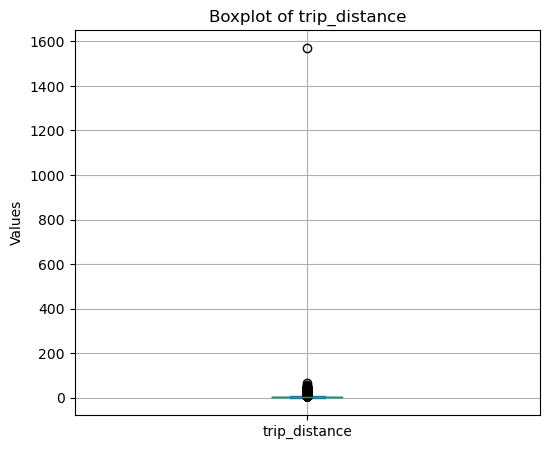

In [1627]:
plt.figure(figsize=(6, 5))
df['trip_distance'].plot(kind='box')
plt.title('Boxplot of trip_distance')
plt.ylabel('Values')
plt.grid(True)
plt.show()

In [1628]:
df.sort_values(by='trip_distance',ascending=False).head(5)

VendorID lpep_pickup_datetime lpep_dropoff_datetime store_and_fwd_flag  \
33373         2  2023-01-17 18:40:38   2023-01-17 19:04:45                  N   
7322          2  2023-01-05 09:00:03   2023-01-05 15:18:38                  N   
43013         2  2023-01-22 10:39:49   2023-01-22 11:48:18                  N   
48770         2  2023-01-24 22:56:13   2023-01-25 19:43:58                  N   
30501         2  2023-01-16 11:21:23   2023-01-16 12:07:33                  N   

       RatecodeID  PULocationID  DOLocationID  passenger_count  trip_distance  \
33373           5            82           236                1        1571.97   
7322            5           134           134                1          66.18   
43013           1            82           265                1          57.09   
48770           5           179           264                4          53.72   
30501           5           175           265                1          48.70   

       fare_amount  ...  lpep_pickup_day_of_week  lpep_pickup_day_of_month  \
33373        29.97  ...                        1                        17   
7322         15.00  ...                        3                         5   
43013       205.30  ...                        6                        22   
48770         0.01  ...                        1                        24   
30501       140.00  ...                        0                        16   

       lpep_pickup_month  lpep_pickup_year  lpep_dropoff_hour  \
33373                  1              2023                 19   
7322                   1              2023                 15   
43013                  1              2023                 11   
48770                  1              2023                 19   
30501                  1              2023                 12   

       lpep_dropoff_day_of_week  lpep_dropoff_day_of_month  \
33373                         1                         17   
7322                          3                          5   
43013                         6                         22   
48770                         2                         25   
30501                         0                         16   

       lpep_dropoff_month  lpep_dropoff_year        duration  
33373                   1               2023 0 days 00:24:07  
7322                    1               2023 0 days 06:18:35  
43013                   1               2023 0 days 01:08:29  
48770                   1               2023 0 days 20:47:45  
30501                   1               2023 0 days 00:46:10  

[5 rows x 30 columns]

Karena setelah outlier 1571.97 paling besar adalah 66.18 mil, maka batas atas 100 dipakai. 

In [1629]:
df = df[df['trip_distance']<100]

Untuk menentukan batas bawah, perlu dilihat hubungan dengan `fare_amount` yang tergantung langsung dengan jarak. Batas bawah tidak dapat serta merta ditentukan lebih dari 0, karena masalah kemungkinan pembulatan atau inakurasi gps/odometer/argo dalam pengukuran dalam skala kecil seperti sekitar 0.004 mil - 0.01 mil yang setara 6.5 m - 16 m dapat menjadi 0.00 atau 0.01 mil. Jarak pendek seperti itu juga mungkin terjadi jika penumpang tidak jadi naik taksi tapi terlanjur masuk dan argo telah dimulai karena macet parah di daerah padat NYC.

Namun, jika `trip_distance` tidak sebanding dengan `fare_amount` maka dapat dikatakan tidak valid.

In [1630]:
display(df[df['fare_amount']>0].sort_values(by='fare_amount',ascending=False)[col_outlier].head(5))

trip_distance  fare_amount  extra  mta_tax  tip_amount  tolls_amount  \
21547           0.00        490.0    0.0      0.0         0.0           0.0   
46373           0.00        459.9    0.0      0.0         0.0           0.0   
59442           0.07        455.0    0.0      0.0         0.0           0.0   
30047           0.00        450.0    0.0      0.0         0.0           0.0   
42278           0.00        450.0    0.0      0.0         0.0           0.0   

       improvement_surcharge  total_amount  congestion_surcharge  
21547                    1.0         491.0                   0.0  
46373                    1.0         460.9                   0.0  
59442                    1.0         456.0                   0.0  
30047                    1.0         451.0                   0.0  
42278                    1.0         451.0                   0.0

Terlihat bahwa ternyata banyak `trip_distance` yang sangat kecil tapi memiliki total sangat besar tanpa ada tip atau tarif lainnya, hanya dari `fare_amount` yang dihitung berdasarkan jarak.

In [1631]:
display(df[df['fare_amount']>0].sort_values(by='fare_amount',ascending=False)[['trip_distance','fare_amount']].head(5))

trip_distance  fare_amount
21547           0.00        490.0
46373           0.00        459.9
59442           0.07        455.0
30047           0.00        450.0
42278           0.00        450.0

Hubungan kedua variable dapat dilihat dengan rasio `trip_distance` dan `fare_amount` dan cari rata-ratanya dan menentukan dengan intuisi outlier yang berarti hubungannya sangat tidak masuk akal

In [1632]:
constR = 0.001 
df['distance_fare_ratio'] = (constR + df['trip_distance']) / (constR + df['fare_amount'] )
# constant 0.001 untuk menjaga hubungan yang trip_distance = 0

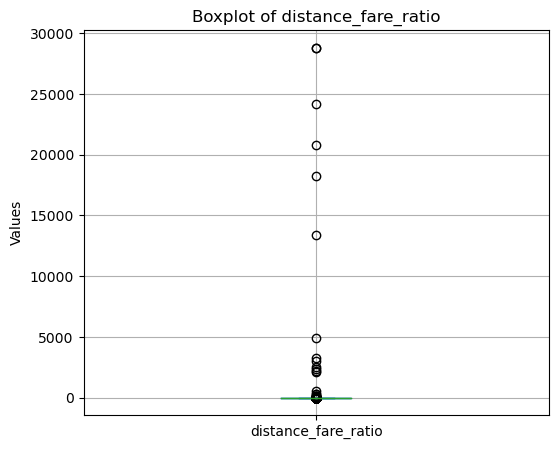

In [1633]:
plt.figure(figsize=(6, 5))
df['distance_fare_ratio'].plot(kind='box')
plt.title('Boxplot of distance_fare_ratio')
plt.ylabel('Values')
plt.grid(True)
plt.show()

Kemudian, menggunakan IQR untuk atasi outlier.

In [1634]:
Q1 = np.percentile(df['distance_fare_ratio'], 25)
Q3 = np.percentile(df['distance_fare_ratio'], 75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

print('lower_bound :', round(lower_bound,3), '\nupper_bound :', round(upper_bound,3))

lower_bound : 0.037 
upper_bound : 0.262


In [1635]:
print('Persentase outlier distance_fare_ratio:',round((len(df) - len(df[(df['distance_fare_ratio']>lower_bound) & (df['distance_fare_ratio']<upper_bound)])) / len(df) * 100, 2), '%')

Persentase outlier distance_fare_ratio: 7.1 %


In [1636]:
df = df[(df['distance_fare_ratio']>lower_bound) & (df['distance_fare_ratio']<upper_bound)]

In [1637]:
display(df[df['fare_amount']>0].sort_values(by='fare_amount',ascending=False)[['trip_distance','fare_amount']].head(5))

trip_distance  fare_amount
7731           25.48        348.1
44927          47.25        322.9
25518          38.24        322.2
556            16.00        292.8
50437          46.29        292.1

Untuk kolom lain, walaupun currency atau uang yang memang mempunyai range sangat besar dan masih masuk akal untuk mencapai ratusan dolar, mari kita cek apakah nilai besar valid.

Cek durasi trip

In [1638]:
# cek durasi nol
from datetime import timedelta
indexZero = df[df['duration']<=timedelta(days = 0)].index.tolist()
df.drop(indexZero,inplace=True)

# cek masih ada atau tidak
len(df[df['duration']<=timedelta(days = 0)])

0

In [1639]:
# cek durasi besar
display(df.sort_values(by='duration',ascending=False)[['trip_distance','duration']].head(5))

trip_distance        duration
33850           1.09 0 days 23:58:56
62120           0.87 0 days 23:58:55
54199           1.89 0 days 23:58:55
31477           1.63 0 days 23:58:46
42778           0.42 0 days 23:58:38

In [1640]:
df['duration_hour'] = df['duration'].dt.total_seconds() / 3600

In [1641]:
hourly_bins = pd.interval_range(start=0, end=24, freq=1, closed='right')
# Bin timedelta values into one-hour intervals
df['duration_bin'] = pd.cut(df['duration_hour'], bins=hourly_bins)

In [1642]:
df_duration = df.groupby('duration_bin').agg({'duration': 'count'}).sort_values(by='duration', ascending=False).reset_index()
df_duration.head(5)

duration_bin  duration
0       (0, 1]     58749
1       (1, 2]       185
2     (23, 24]       129
3     (22, 23]        29
4       (8, 9]         9

Terlihat jelas durasi valid hanya sampai dengan 1 jam, berhubung 2 jam masih dekat maka tidak dibuang. Untuk yang sangat panjang di atas 20 jam, merupakan outlier dari durasi trip.

In [1643]:
print('Persentase Outlier Duration :',round(df_duration['duration'][2:].sum()/ df_duration['duration'].sum()*100,2), '%')

Persentase Outlier Duration : 0.41 %


Dengan persentase  0.41 %, maka dapat di drop untuk bin 1 jam dan 2 jam.

Cek Persentase pada tabel

In [1644]:
print('Persentase Outlier Duration Tabel :',round(len(df[df['duration_hour']>2])/len(df)*100,2), '%') 

Persentase Outlier Duration Tabel : 0.41 %


Mengatasi outlier `duration`

In [1645]:
df = df[df['duration_hour']<=2]

**Dataset 2**

**Data Duplicate**

In [1646]:
df_zone.duplicated().sum()

0

Tidak ada data duplikat pada dataset 2

In [1647]:
df_zone.duplicated(subset=['LocationID']).sum()

0

Tidak ada id unique duplikat pada dataset 2

**Missing Values**

In [1648]:
df_zone.isna().sum()

LocationID      0
Borough         1
Zone            1
service_zone    2
dtype: int64

In [1649]:
df_zone[df_zone.isna().any(axis=1)]

LocationID  Borough            Zone service_zone
263         264  Unknown             NaN          NaN
264         265      NaN  Outside of NYC          NaN

NaN dalam hal ini dikarenakan klasifikasi dilakukan untuk Borough yang tidak diketahui dan Borough diluar NYC. Oleh karena itu, drop tidak dilakukan. Namun, kita dapat replace NaN dengan Unknown untuk unknown Borough dan Outside of NYC untuk Borough yang bersangkutan.

In [1650]:
for index, row in df_zone.iterrows():
    if row['Borough'] == 'Unknown':
        df_zone.loc[index, 'Zone'] = 'Unknown'
        df_zone.loc[index, 'service_zone'] = 'Unknown'
    if row['Zone'] == 'Outside of NYC':
        df_zone.loc[index, 'Borough'] = 'Outside of NYC'
        df_zone.loc[index, 'service_zone'] = 'Outside of NYC'

In [1651]:
df_zone[(df_zone['Borough'] == 'Unknown') | (df_zone['Zone'] == 'Outside of NYC')]

LocationID         Borough            Zone    service_zone
263         264         Unknown         Unknown         Unknown
264         265  Outside of NYC  Outside of NYC  Outside of NYC

**Merge Dataset 1 dan 2**

Merge dilakukan dengan left join mengacu pada dataset 1 dan mencocokkan PULocationID dan DOLocationID dengan LocationID pada dataset 2.

In [1652]:
merged_table_pickup = pd.merge(df, df_zone, left_on='PULocationID', right_on='LocationID', how='left')
merged_table_pickup.rename(columns={'Borough':'PUBorough', 'Zone':'PUZone', 'service_zone':'PUservice_zone'}, inplace=True)

merged_table = pd.merge(merged_table_pickup, df_zone, left_on='DOLocationID', right_on='LocationID', how='left')
merged_table.rename(columns={'Borough':'DOBorough', 'Zone':'DOZone', 'service_zone':'DOservice_zone'}, inplace=True)

merged_table.drop(columns=['LocationID_x','LocationID_y'], inplace=True)

display(merged_table.head(),merged_table.tail())

VendorID lpep_pickup_datetime lpep_dropoff_datetime store_and_fwd_flag  \
0         2  2023-01-01 00:26:10   2023-01-01 00:37:11                  N   
1         2  2023-01-01 00:51:03   2023-01-01 00:57:49                  N   
2         1  2023-01-01 00:13:14   2023-01-01 00:19:03                  N   
3         1  2023-01-01 00:33:04   2023-01-01 00:39:02                  N   
4         2  2023-01-01 00:53:31   2023-01-01 01:11:04                  N   

   RatecodeID  PULocationID  DOLocationID  passenger_count  trip_distance  \
0           1           166           143                1           2.58   
1           1            24            43                1           1.81   
2           1            41           238                1           1.30   
3           1            41            74                1           1.10   
4           1            41           262                1           2.78   

   fare_amount  ...        duration  distance_fare_ratio  duration_hour  \
0         14.9  ... 0 days 00:11:01             0.173210       0.183611   
1         10.7  ... 0 days 00:06:46             0.169237       0.112778   
2          6.5  ... 0 days 00:05:49             0.200123       0.096944   
3          6.0  ... 0 days 00:05:58             0.183469       0.099444   
4         17.7  ... 0 days 00:17:33             0.157110       0.292500   

   duration_bin  PUBorough               PUZone  PUservice_zone  DOBorough  \
0        (0, 1]  Manhattan  Morningside Heights       Boro Zone  Manhattan   
1        (0, 1]  Manhattan         Bloomingdale     Yellow Zone  Manhattan   
2        (0, 1]  Manhattan       Central Harlem       Boro Zone  Manhattan   
3        (0, 1]  Manhattan       Central Harlem       Boro Zone  Manhattan   
4        (0, 1]  Manhattan       Central Harlem       Boro Zone  Manhattan   

                  DOZone  DOservice_zone  
0    Lincoln Square West     Yellow Zone  
1           Central Park     Yellow Zone  
2  Upper West Side North     Yellow Zone  
3      East Harlem North       Boro Zone  
4         Yorkville East     Yellow Zone  

[5 rows x 39 columns]

VendorID lpep_pickup_datetime lpep_dropoff_datetime store_and_fwd_flag  \
58929         2  2023-01-31 23:09:22   2023-01-31 23:17:21                  N   
58930         2  2023-01-31 23:06:18   2023-01-31 23:17:03                  N   
58931         2  2023-01-31 23:17:03   2023-01-31 23:23:04                  N   
58932         2  2023-01-31 23:29:18   2023-01-31 23:38:50                  N   
58933         2  2023-01-31 23:00:12   2023-01-31 23:10:08                  N   

       RatecodeID  PULocationID  DOLocationID  passenger_count  trip_distance  \
58929           5           130           205                1           2.75   
58930           1            65           181                1           2.44   
58931           1           244           116                1           1.40   
58932           1            74           238                1           2.47   
58933           1            95            95                1           1.39   

       fare_amount  ...        duration  distance_fare_ratio  duration_hour  \
58929         15.0  ... 0 days 00:07:59             0.183388       0.133056   
58930         13.5  ... 0 days 00:10:45             0.180801       0.179167   
58931          9.3  ... 0 days 00:06:01             0.150629       0.100278   
58932         13.5  ... 0 days 00:09:32             0.183023       0.158889   
58933         11.4  ... 0 days 00:09:56             0.122007       0.165556   

       duration_bin  PUBorough                       PUZone  PUservice_zone  \
58929        (0, 1]     Queens                      Jamaica       Boro Zone   
58930        (0, 1]   Brooklyn  Downtown Brooklyn/MetroTech       Boro Zone   
58931        (0, 1]  Manhattan     Washington Heights South       Boro Zone   
58932        (0, 1]  Manhattan            East Harlem North       Boro Zone   
58933        (0, 1]     Queens                 Forest Hills       Boro Zone   

       DOBorough                 DOZone  DOservice_zone  
58929     Queens           Saint Albans       Boro Zone  
58930   Brooklyn             Park Slope       Boro Zone  
58931  Manhattan       Hamilton Heights       Boro Zone  
58932  Manhattan  Upper West Side North     Yellow Zone  
58933     Queens           Forest Hills       Boro Zone  

[5 rows x 39 columns]

In [1653]:
df = merged_table

## Data yang sudah bersih dan di-merge
Pembersihan data telah selesai, berikut informasi dari data yang sudah dibersihkan

In [1654]:
listItem = []
for col in df.columns :
    listItem.append([col, df[col].dtype, df[col].isna().sum(),
                    df[col].nunique(), list(df[col].drop_duplicates().sample(2).values)]);

dfDesc = pd.DataFrame(columns=['dataFeatures', 'dataType', 'null', 'unique', 'uniqueSample'],
                     data=listItem)
print(df.shape)
dfDesc

(58934, 39)


dataFeatures         dataType  null  unique  \
0                    VendorID            int64     0       2   
1        lpep_pickup_datetime   datetime64[ns]     0   58052   
2       lpep_dropoff_datetime   datetime64[ns]     0   58007   
3          store_and_fwd_flag           object     0       2   
4                  RatecodeID            int32     0       5   
5                PULocationID            int64     0     183   
6                DOLocationID            int64     0     244   
7             passenger_count            int32     0       8   
8               trip_distance          float64     0    1606   
9                 fare_amount          float64     0     288   
10                      extra          float64     0      12   
11                    mta_tax          float64     0       4   
12                 tip_amount          float64     0    1263   
13               tolls_amount          float64     0      20   
14      improvement_surcharge          float64     0       3   
15               total_amount          float64     0    3213   
16               payment_type            int32     0       4   
17                  trip_type            int32     0       2   
18       congestion_surcharge          float64     0       3   
19           lpep_pickup_hour            int32     0      24   
20    lpep_pickup_day_of_week            int32     0       7   
21   lpep_pickup_day_of_month            int32     0      31   
22          lpep_pickup_month            int32     0       3   
23           lpep_pickup_year            int32     0       2   
24          lpep_dropoff_hour            int32     0      24   
25   lpep_dropoff_day_of_week            int32     0       7   
26  lpep_dropoff_day_of_month            int32     0      31   
27         lpep_dropoff_month            int32     0       3   
28          lpep_dropoff_year            int32     0       2   
29                   duration  timedelta64[ns]     0    3078   
30        distance_fare_ratio          float64     0   12913   
31              duration_hour          float64     0    3078   
32               duration_bin         category     0       2   
33                  PUBorough           object     0       7   
34                     PUZone           object     0     182   
35             PUservice_zone           object     0       5   
36                  DOBorough           object     0       8   
37                     DOZone           object     0     243   
38             DOservice_zone           object     0       6   

                                                      uniqueSample  
0                                                           [1, 2]  
1   [2023-01-03T07:37:55.000000000, 2023-01-08T17:20:36.000000000]  
2   [2023-01-15T16:27:55.000000000, 2023-01-11T15:25:50.000000000]  
3                                                           [Y, N]  
4                                                           [1, 3]  
5                                                       [242, 262]  
6                                                         [81, 18]  
7                                                           [1, 0]  
8                                                    [9.83, 11.22]  
9                                                    [12.21, 45.5]  
10                                                      [6.0, 1.0]  
11                                                      [0.0, 1.5]  
12                                                    [6.38, 0.91]  
13                                                     [7.0, 6.75]  
14                                                      [1.0, 0.3]  
15                                                   [38.82, 27.3]  
16                                                          [1, 3]  
17                                                          [2, 1]  
18                                                      [0.0, 2.5]  
19                                                         [2, 10]  
20     

In [1655]:
print('row,col awal dataset awal = 68211, 20') 
print(f'row,col akhir dataset clean dan merge  = {df.shape[0]}, {df.shape[1]}')

row,col awal dataset awal = 68211, 20
row,col akhir dataset clean dan merge  = 58934, 39


In [1656]:
print('Persentase data yang di-clean :',round((68211 - df.shape[0]) / 68211 * 100,2), '%')

Persentase data yang di-clean : 13.6 %


Sebelum dibersihkan dan merge data, terdapat 68,211 baris data dan sekarang kita memiliki 58,935 baris. Sekitar 10,000 baris atau 13.6 % data kosong, invalid, dan outlier dihapus. Namun kolom data bertambah menjadi 39 dikarenakan beberapa kolom hubungan antar kolom, merge data dengan left join, dan pemecahan kolom waktu datetime.

Save data clean dalam bentuk csv

In [1657]:
# df.to_csv('NYC TLC Trip Record_Cleaned.csv', index=False)
# df.to_pickle('NYC TLC Trip Record_Cleaned.pkl')

# F. Data Analysis
Tahap *data cleaning* telah dilakukan. Kemudian, dilanjutkan oleh analisis untuk mencari tahu **pola perilaku** pelanggan dan **pola trip** untuk menjawab kesediaan armada dan optimasi pendapatan.  

Analisis akan dilakukan dengan dibagi menjadi dua tahap. Pertama, melihat pola trip populer yang dipilih penumpang dengan pedoman analisis RFM (recency, frequency, monetary) berdasarkan fitur yang tersedia. Kedua, pola trip yang lebih menekankan pada spatio-temporal data untuk mendapatkan mana karakteristik fitur tertentu yang menyebabkan permintaan banyak yang dapat digunakan untuk memperkuat kesediaan armada pada fitur tersebut.


In [1658]:
# Code untuk load data clean, untuk resume
# df=pd.read_csv('NYC TLC Trip Record_Cleaned.csv',low_memory=False)
# df=pd.read_pickle('NYC TLC Trip Record_Cleaned.pkl')

In [1659]:
# df1=pd.read_pickle('NYC TLC Trip Record_Cleaned.pkl')
# df1.equals(df)

## Pola Perilaku Pelanggan

Analisa berdasar : 
1. RFM Analysis
2. Berdasar `trip_distance`
3. Berdasar `passenger_count`
4. Berdasar `payment_type`
5. Berdasar `trip_type`
6. Berdasar `tip_amount`

**1. RFM Analysis**

Analisis ini tanpa menggunaka nama customer atau id unique, tapi menggunakan trip dari dan ke borough sebagai tinjauan segmen pelanggan yang memesan dengan pilihan rute tersebut. Adapun kita bisa menjawab beberapa pertanyaan lewat ini :
1. Seberapa besar rute pilihan customer yang paling populer dibandingkan rute lainnya ?
2. Rute pilihan customer yang paling populer karakteristiknya apa ?

In [1660]:
# Rute
df['Route'] = df['PUBorough'] + '-' + df['DOBorough']

In [1661]:
# Recency
df_recency = df.groupby(by='Route', as_index=False)['lpep_dropoff_datetime'].max()
df_recency.columns = ['Route', 'lpep_dropoff_datetime']
recent_date = df_recency['lpep_dropoff_datetime'].max()
df_recency['Recency'] = df_recency['lpep_dropoff_datetime'].apply(lambda x: (recent_date - x).days)

# Frequency
df_frequency = df.groupby(by='Route', as_index=False)['lpep_dropoff_datetime'].count()
df_frequency.columns = ['Route', 'Frequency']
df_frequency.head()

# Monetary
df_monetary = df.groupby(by='Route', as_index=False)['total_amount'].sum()
df_monetary.columns = ['Route', 'Monetary']
df_monetary.head()

display(df_recency.head(),df_frequency.head(),df_monetary.head())

df_rf = df_recency.merge(df_frequency, on='Route')
df_rfm = df_rf.merge(df_monetary, on='Route').drop(
    columns='lpep_dropoff_datetime')
display(df_rfm.head())

Route lpep_dropoff_datetime  Recency
0           Bronx-Bronx   2023-01-31 20:53:45        0
1       Bronx-Manhattan   2023-01-31 13:46:59        0
2  Bronx-Outside of NYC   2023-01-30 01:00:55        2
3          Bronx-Queens   2023-01-29 20:14:38        2
4         Bronx-Unknown   2023-01-06 15:03:09       25

Route  Frequency
0           Bronx-Bronx        344
1       Bronx-Manhattan        147
2  Bronx-Outside of NYC          5
3          Bronx-Queens         12
4         Bronx-Unknown          1

Route  Monetary
0           Bronx-Bronx   6076.97
1       Bronx-Manhattan   3509.49
2  Bronx-Outside of NYC    240.50
3          Bronx-Queens    740.99
4         Bronx-Unknown     34.60

Route  Recency  Frequency  Monetary
0           Bronx-Bronx        0        344   6076.97
1       Bronx-Manhattan        0        147   3509.49
2  Bronx-Outside of NYC        2          5    240.50
3          Bronx-Queens        2         12    740.99
4         Bronx-Unknown       25          1     34.60

In [1662]:
df_rfm['R_rank'] = df_rfm['Recency'].rank(ascending=False)
df_rfm['F_rank'] = df_rfm['Frequency'].rank(ascending=True)
df_rfm['M_rank'] = df_rfm['Monetary'].rank(ascending=True)
 
# normalizing the rank of the customers
df_rfm['R_rank_norm'] = (df_rfm['R_rank']/df_rfm['R_rank'].max())*100
df_rfm['F_rank_norm'] = (df_rfm['F_rank']/df_rfm['F_rank'].max())*100
df_rfm['M_rank_norm'] = (df_rfm['F_rank']/df_rfm['M_rank'].max())*100
 
df_rfm.drop(columns=['R_rank', 'F_rank', 'M_rank'], inplace=True)
 
df_rfm.head()

Route  Recency  Frequency  Monetary  R_rank_norm  \
0           Bronx-Bronx        0        344   6076.97   100.000000   
1       Bronx-Manhattan        0        147   3509.49   100.000000   
2  Bronx-Outside of NYC        2          5    240.50    51.851852   
3          Bronx-Queens        2         12    740.99    51.851852   
4         Bronx-Unknown       25          1     34.60     7.407407   

   F_rank_norm  M_rank_norm  
0    77.142857    77.142857  
1    68.571429    68.571429  
2    25.714286    25.714286  
3    47.142857    47.142857  
4     8.571429     8.571429

In [1663]:
weightR = 0.15
weightF = 0.45
weightM = 0.40

# Weighted RFM_Score
df_rfm['RFM_Score'] = round(weightR*df_rfm['R_rank_norm'] + weightF*df_rfm['F_rank_norm'] + weightM*df_rfm['M_rank_norm'])

# Bin RFM scores
bin_edges = [0, 20, 40, 60, 80, 101]
df_rfm['R'] = pd.cut(df_rfm['R_rank_norm'], bins=bin_edges, labels=False, right=False) + 1
df_rfm['F'] = pd.cut(df_rfm['F_rank_norm'], bins=bin_edges, labels=False, right=False) + 1
df_rfm['M'] = pd.cut(df_rfm['M_rank_norm'], bins=bin_edges, labels=False, right=False) + 1
df_rfm['RFM_Score'] = pd.cut(df_rfm['RFM_Score'], bins=bin_edges, labels=False, right=False) + 1

# Skala 5 : 100 nilai normalized di kali 0.05 agar jadi skala 5
df_rfm[['Route', 'R','F','M','RFM_Score']].head(5)


Route  R  F  M  RFM_Score
0           Bronx-Bronx  5  4  4          5
1       Bronx-Manhattan  5  4  4          4
2  Bronx-Outside of NYC  3  2  2          2
3          Bronx-Queens  3  3  3          3
4         Bronx-Unknown  1  1  1          1

In [1664]:
# Segmen kombinasi
df_rfm['RFM_Segment'] = df_rfm['R'].astype(str) + df_rfm['F'].astype(str) + df_rfm['M'].astype(str)

# Map Label RFM 
rfm_segments = {
    '555': "Best Customers' Choice",
    '554': "Best Customers' Choice",
    '553': "Best Customers' Choice",
    '552': "Best Customers' Choice",
    '551': "Best Customers' Choice",
    '544': "Loyal Customers' Choice",
    '543': "Loyal Customers' Choice",
    '542': "Loyal Customers' Choice",
    '541': "Loyal Customers' Choice",
    '533': "Loyal Customers' Choice",
    '532': "Loyal Customers' Choice",
    '531': "Loyal Customers' Choice",
    '522': "Loyal Customers' Choice",
    '521': "Loyal Customers' Choice",
    '511': "Loyal Customers' Choice",
    '444': "Big Spenders' Choice",
    '443': "Big Spenders' Choice",
    '442': "Big Spenders' Choice",
    '441': "Big Spenders' Choice",
    '433': "Big Spenders' Choice",
    '432': "Big Spenders' Choice",
    '431': "Big Spenders' Choice",
    '422': "Almost Lost' Choice",
    '421': "Almost Lost' Choice",
    '411': "Lost Customers' Choice",
    '344': "Recent Customers' Choice",
    '343': "Frequent Spenders' Choice",
    '342': "Frequent Spenders' Choice",
    '341': "Frequent Spenders' Choice",
    '333': "Frequent Spenders' Choice",
    '332': "Frequent Spenders' Choice",
    '331': "Frequent Spenders' Choice",
    '322': "Dormant Customers' Choice",
    '321': "Dormant Customers' Choice",
    '311': "Dormant Customers' Choice",
    '244': "Recent Customers' Choice",
    '243': "Recent Customers' Choice",
    '242': "Recent Customers' Choice",
    '241': "Recent Customers' Choice",
    '233': "Frequent Spenders' Choice",
    '232': "Frequent Spenders' Choice",
    '231': "Frequent Spenders' Choice",
    '222': "Dormant Customers' Choice",
    '221': "Dormant Customers' Choice",
    '211': "Churned Customers' Choice",
    '144': "Recent Customers' Choice",
    '143': "Recent Customers' Choice",
    '142': "Recent Customers' Choice",
    '141': "Recent Customers' Choice",
    '133': "Frequent Spenders' Choice",
    '132': "Frequent Spenders' Choice",
    '131': "Frequent Spenders' Choice",
    '122': "Dormant Customers' Choice",
    '121': "Dormant Customers' Choice",
    '111': "Inactive Customers' Choice"
}


df_rfm['RFM_Label'] = df_rfm['RFM_Segment'].map(rfm_segments)
display(df_rfm.sort_values(by=['R_rank_norm','F_rank_norm','M_rank_norm'], ascending=False).head(10))



Route  Recency  Frequency   Monetary  R_rank_norm  \
15  Manhattan-Manhattan        0      33891  640085.87        100.0   
28        Queens-Queens        0      14130  269718.16        100.0   
6     Brooklyn-Brooklyn        0       5467  110515.51        100.0   
12      Manhattan-Bronx        0       1250   29624.67        100.0   
8    Brooklyn-Manhattan        0       1192   46965.30        100.0   
26     Queens-Manhattan        0        740   31945.33        100.0   
17     Manhattan-Queens        0        662   34677.06        100.0   
24      Queens-Brooklyn        0        391   16270.31        100.0   
0           Bronx-Bronx        0        344    6076.97        100.0   
10      Brooklyn-Queens        0        257   12394.18        100.0   

    F_rank_norm  M_rank_norm  RFM_Score  R  F  M RFM_Segment  \
15   100.000000   100.000000          5  5  5  5         555   
28    97.142857    97.142857          5  5  5  5         555   
6     94.285714    94.285714          5  5  5  5         555   
12    91.428571    91.428571          5  5  5  5         555   
8     88.571429    88.571429          5  5  5  5         555   
26    85.714286    85.714286          5  5  5  5         555   
17    82.857143    82.857143          5  5  5  5         555   
24    80.000000    80.000000          5  5  5  5         555   
0     77.142857    77.142857          5  5  4  4         544   
10    74.285714    74.285714          4  5  4  4         544   

                  RFM_Label  
15   Best Customers' Choice  
28   Best Customers' Choice  
6    Best Customers' Choice  
12   Best Customers' Choice  
8    Best Customers' Choice  
26   Best Customers' Choice  
17   Best Customers' Choice  
24   Best Customers' Choice  
0   Loyal Customers' Choice  
10  Loyal Customers' Choice

In [1665]:
import plotly.express as px

# Group by RFM_Label dan count
segment_counts = df_rfm['RFM_Label'].value_counts().reset_index()
segment_counts.columns = ['RFM_Label', 'Count']

# Plot segment chart dengan Plotly
fig = px.bar(segment_counts, x='RFM_Label', y='Count', title='RFM Segment Chart')
fig.update_layout(xaxis_title='RFM Segment', yaxis_title='Count')
fig.show()


In [1666]:
print('Persentase Loyal dan Best :',round(segment_counts['Count'][0:2].sum() / segment_counts['Count'].sum()*100,2),'%')

Persentase Loyal dan Best : 48.57 %


Sudah ada hampir 50% customer loyal dan best.

In [1667]:
import plotly.express as px

rfm_segment_colors = ['red', 'purple', 'brown', 'pink', 'gray', 
                      'blue', 'green', 'orange', 'cyan', 'yellow']

fig = px.treemap(segment_counts, 
                 path=['RFM_Label'], 
                 values='Count',
                 color='RFM_Label',
                 labels='RFM_Label',
                 color_discrete_sequence=rfm_segment_colors
                )
fig.update_layout(
    title='RFM Segments Treemap', title_x= 0.5, 
    hoverlabel=dict(bgcolor="white", font_size=16, font_family="Calibri"),
    height=700, width=700)
fig.update_traces(hoverinfo='label+value', textinfo='label', textfont_size=15)
fig.show()




![img](census.png)

Source : https://www.nyc.gov/site/planning/planning-level/nyc-population/current-future-populations.page

![img](census1.png)

Source : https://en.wikipedia.org/wiki/Boroughs_of_New_York_City

**Insight :** 
1. Sudah ada hampir 50% rute customer loyal dan best. Namun, hal sebaliknya juga benar bahwa terdapat setengah lagi potensi segmen market yang bisa dimanfaatkan jika ditinjau dengan rute pilihan pelanggan penumpang. Hal ini menjelaskan preferensi pelanggan terhadap rute populer yang kemungkinan besar potential customer akan pilih.
2. Tiga Rute paling populer pilihan customer, Manhattan-Manhattan, Queens-Queens, dan Brooklyn-Brooklyn mengindikasi bahwa customer punya preferensi untuk memilih rute inner Borough di ketiga kota besar NYC. Tentu jika kita cocokkan pada data sensus NYC, terlihat bahwa proporsi paling besar adalah Queens, Brooklyn, dan Manhattan. Namun, jika kita melihat density seperti pada tabel yang telah disusun Wikipedia dari berbagai data sensus, maka terlihat jelas Manhattan adalah yang terpadat dan didukung kontribusi GDP sangat besar. Hal tersebut punya makna aktivitas kota yang tinggi dan rute populer transportation service tentu akan mengikuti.

**2. Berdasarkan jarak dan durasi trip: `trip_distance` dan `duration_hour`**

Kita akan menganalisa kolom  `trip_distance` dan `duration_hour` untuk menjawab beberapa pertanyaan berikut.

1. Interval jarak dan durasi yang memiliki paling banyak pelanggan trip?
2. Apakah hubungan jarak dan durasi terhadap  **Total Bayaran**?

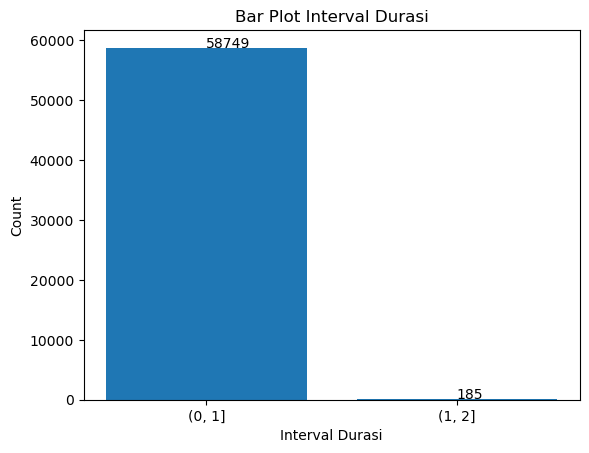

In [1668]:
count_duration = df.groupby('duration_bin')['total_amount'].count()
count_duration = count_duration.reset_index()
count_duration = count_duration[count_duration['total_amount']>0]

plt.bar(count_duration['duration_bin'].astype(str), count_duration['total_amount'])

# Annotate untuk setiap bar
for i in range(len(count_duration)):
    plt.annotate(f"{count_duration['total_amount'][i]}", (count_duration['duration_bin'].astype(str)[i], count_duration['total_amount'][i]))


plt.xlabel('Interval Durasi')
plt.ylabel('Count')
plt.title('Bar Plot Interval Durasi')

plt.show()

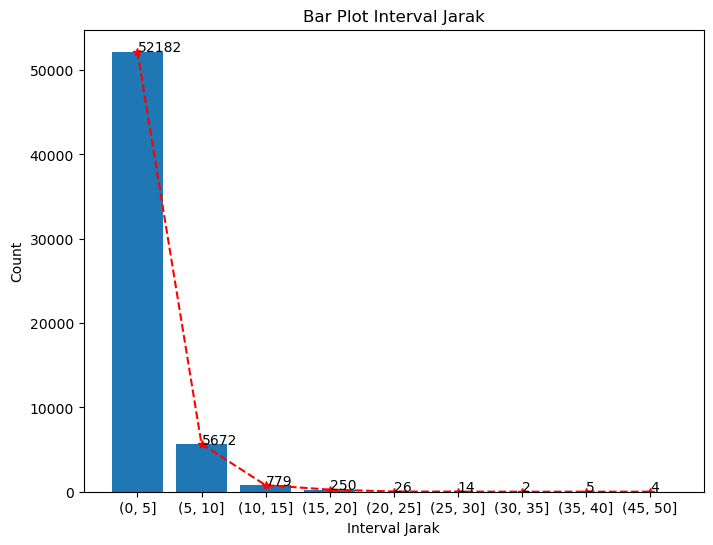

In [1669]:
distanceBin = pd.interval_range(start=0, end=50, freq=5)
df['trip_distance_bin']=pd.cut(df['trip_distance'], distanceBin )
count_distance = df.groupby('trip_distance_bin')['total_amount'].count()
count_distance = count_distance.reset_index()
count_distance = count_distance[count_distance['total_amount']>0]
count_distance = count_distance.reset_index()

plt.figure(figsize=(8, 6))
plt.bar(count_distance['trip_distance_bin'].astype(str), count_distance['total_amount'])

# Plot peak to peak line
plt.plot(count_distance['trip_distance_bin'].astype(str), count_distance['total_amount'], color='red', linestyle='--',marker='*')

# Annotate untuk setiap bar
for i in range(len(count_distance)):
    plt.annotate(f"{count_distance['total_amount'][i]}", (count_distance['trip_distance_bin'].astype(str)[i], count_distance['total_amount'][i]))

plt.xlabel('Interval Jarak')
plt.ylabel('Count')
plt.title('Bar Plot Interval Jarak')

plt.show()

Tes kenormalan untuk menentukan rata-rata yang digunakan median atau mean

Shapiro-Wilk test
Ho : Distribusi Normal
Ha : Distribusi Tidak Normal
Statistic value : 0.7624531984329224
p-value: 0.0 < 0.05 artinya Ho ditolak


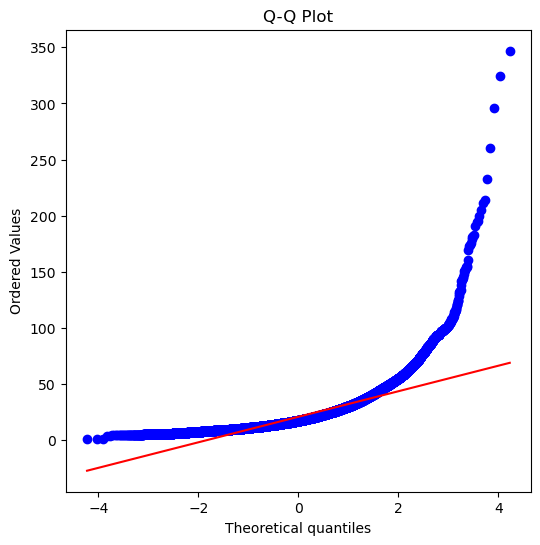

In [1670]:
import scipy.stats as stats

# Shapiro-Wilk test
shapiro_test_statistic, shapiro_p_value = stats.shapiro(df['total_amount'])
print("Shapiro-Wilk test")
print("Ho : Distribusi Normal")
print("Ha : Distribusi Tidak Normal")
print("Statistic value :", shapiro_test_statistic)
print("p-value:", shapiro_p_value, "< 0.05 artinya Ho ditolak")

# Create Q-Q plot
fig, ax = plt.subplots(figsize=(6, 6))
stats.probplot(df['total_amount'], dist="norm", plot=ax)
ax.set_title('Q-Q Plot')
plt.show()


Karena bukan normal, digunakan median sebagai fungsi agregat rata-rata

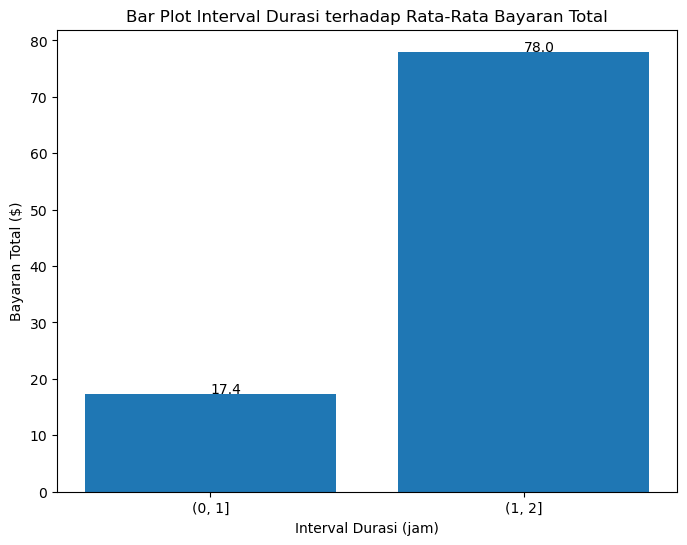

In [1671]:
median_duration = df.groupby('duration_bin')['total_amount'].median()
median_duration = median_duration.reset_index()
if len(median_duration[median_duration['total_amount']>0]) != 0:
    median_duration = median_duration[median_duration['total_amount']>0]
    median_duration = median_duration.reset_index()

plt.figure(figsize=(8, 6))
plt.bar(median_duration['duration_bin'].astype(str), median_duration['total_amount'])

# Annotate untuk setiap bar
for i in range(len(median_duration)):
    plt.annotate(f"{median_duration['total_amount'][i]}", (median_duration['duration_bin'].astype(str)[i], median_duration['total_amount'][i]))

plt.xlabel('Interval Durasi (jam)')
plt.ylabel('Bayaran Total ($)')
plt.title('Bar Plot Interval Durasi terhadap Rata-Rata Bayaran Total')

plt.show()

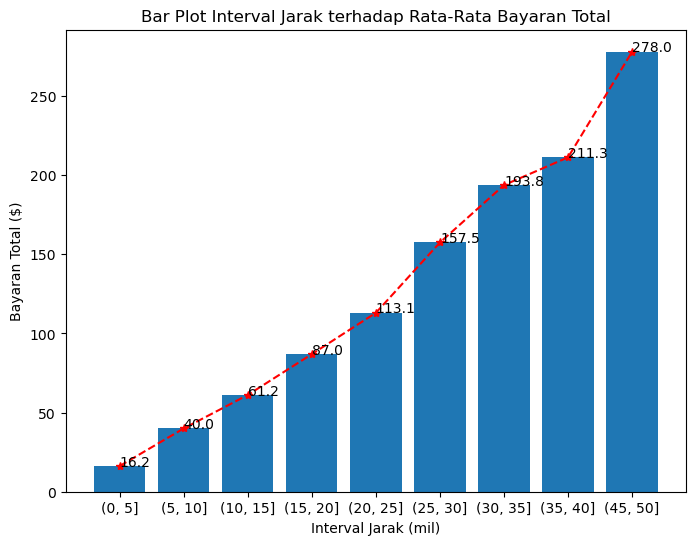

In [1672]:
df['trip_distance_bin']=pd.cut(df['trip_distance'], distanceBin )
median_distance = df.groupby('trip_distance_bin')['total_amount'].median()
median_distance = median_distance.reset_index()
median_distance = median_distance[median_distance['total_amount']>0]
median_distance = median_distance.reset_index()

plt.figure(figsize=(8, 6))
plt.bar(median_distance['trip_distance_bin'].astype(str), median_distance['total_amount'])

# Plot peak to peak line
plt.plot(median_distance['trip_distance_bin'].astype(str), median_distance['total_amount'], color='red', linestyle='--',marker='*')

# Annotate untuk setiap bar
for i in range(len(median_distance)):
    plt.annotate(f"{round(median_distance['total_amount'][i],1)}", (median_distance['trip_distance_bin'].astype(str)[i], median_distance['total_amount'][i]))

plt.xlabel('Interval Jarak (mil)')
plt.ylabel('Bayaran Total ($)')
plt.title('Bar Plot Interval Jarak terhadap Rata-Rata Bayaran Total')

plt.show()

In [1673]:
fig = px.scatter(df, x='trip_distance', y='total_amount', title='Scatter Plot Jarak Trip dan Total Bayaran')
fig.update_layout(
    title_x= 0.5, 
    hoverlabel=dict(bgcolor="white", font_size=16, font_family="Calibri"),
    height=600, width=600)
fig.update_xaxes(title_text='Jarak Trip (miles)')
fig.update_yaxes(title_text='Total Bayaran ($)')
fig.show()

In [1674]:
fig = px.scatter(df, x='duration_hour', y='total_amount', title='Scatter Plot Durasi dan Total Bayaran')
fig.update_layout(
    title_x= 0.5, 
    hoverlabel=dict(bgcolor="white", font_size=16, font_family="Calibri"),
    height=600, width=600)
fig.update_xaxes(title_text='Durasi (jam)')
fig.update_yaxes(title_text='Total Bayaran ($)')
fig.show()

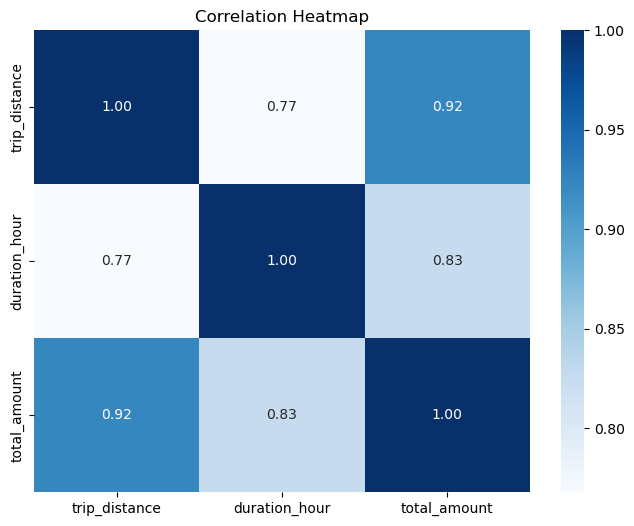

In [1675]:
# Correlation matrix
corr_matrix = df[['trip_distance','duration_hour','total_amount']].corr() 
# Plot heatmap
plt.figure(figsize=(8, 6))  
sns.heatmap(corr_matrix, annot=True, cmap='Blues', fmt=".2f")  
plt.title('Correlation Heatmap')  
plt.show() 


**Insight :** 
1. Interval jarak dan durasi yang memiliki paling banyak pelanggan trip adalah 0 - 1 jam dan 0 - 5 mil. Artinya pelanggan memiliki preferensi trip pendek dan cepat.
2. Hubungan jarak dan durasi terhadap  **Total Bayaran** adalah berbanding lurus. Jika ditinjau melalui korelasi, terlihat bahwa korelasi tinggi positif di atas 0.80 untuk keduanya terhadap **Total Bayaran**. Namun, karena count sedikit untuk interval trip panjang kemungkinan walaupun segi pendapatan tinggi, tapi dengan frekuensi yang sedikit akan cenderung lebih tidak stabil dalam pendapatan sepanjang waktu berlalu.

**3. Berdasarkan Jumlah Penumpang : `passenger_count`** 

Kita akan menganalisa kolom  `passenger_count` untuk menjawab beberapa pertanyaan berikut.

1. Apakah ada jumlah trip yang signifikan pada `passenger_count` tertentu ?


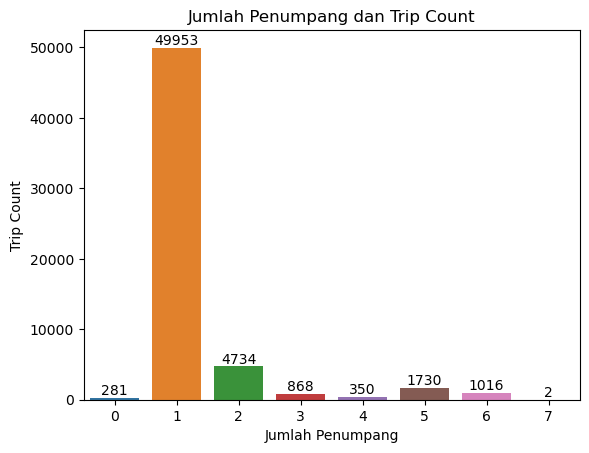

In [1676]:
# Plot bar plot, kali ini menggunakan seaborn
count_plot = sns.countplot(df, x=df['passenger_count'])
# Label value annotate
for i in count_plot.containers:
    count_plot.bar_label(i)

plt.title("Jumlah Penumpang dan Trip Count")
plt.xlabel('Jumlah Penumpang')
plt.ylabel('Trip Count')
plt.show()

**Insight :** 
1. Jumlah trip sangat didominasi oleh penumpang tunggal, yang kemudian walaupun terdapat perbedaan cukup jauh diikuti oleh penumpang berdua. Hal ini berarti, penumpang lebih memilih untuk pergi dengan grup kecil di bawah 2.
2. Tambahan : Terdapat jumlah penumpang nol yang telah dibahas sekilas pada saat cleaning. Di sini kembali kita lihat dengan jumlah kedua terkecil, namun tetap ada di ratusan. Angka ini dapat dijelaskan oleh kesalahan input atau anomali praktik driver dan penumpang.

**4. Berdasarkan Tipe Payment : `payment_type`** 

Kita akan menganalisa kolom  `payment_type` untuk menjawab beberapa pertanyaan berikut.

1. Apakah metode pembayaran yang paling signifikan menurut banyak trip ?

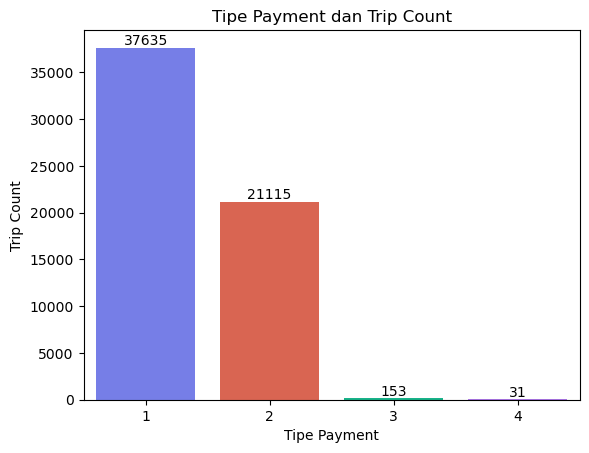

In [1677]:
# Plot bar plot
custom_colors = ['#636efa', '#ef553b', '#00cc96', '#ab63fa']
count_plot = sns.countplot(df, x=df['payment_type'], palette=custom_colors)
# Label value annotate
for i in count_plot.containers:
    count_plot.bar_label(i)

plt.title("Tipe Payment dan Trip Count")
plt.xlabel('Tipe Payment')
plt.ylabel('Trip Count')
plt.show()

| Tipe Payment |
|---|
|1 = Credit card |
|2 = Cash |
|3 = No charge |
|4 = Dispute |
|5 = Unknown |
|6 = Voided trip |

In [1678]:
df_pie = df.groupby('payment_type')['total_amount'].count()
df_pie = df_pie.reset_index().sort_values(by='total_amount',ascending=False)
df_pie['label'] = ['Credit card', 'Cash', 'No charge', 'Dispute']

explodes = [0, 0, 0.03, 0.05] 
labels = ['Credit card', 'Cash', 'No charge', 'Dispute']
values = df_pie['total_amount']

fig = go.Figure(data=[go.Pie(labels=labels, values=values, pull=explodes)])
fig.update_layout(
    title='Persentase Tipe Payment', title_x= 0.5, 
    hoverlabel=dict(bgcolor="white", font_size=16, font_family="Calibri"),
    height=500, width=500)
fig.update_traces(hoverinfo='label+percent+value', textinfo='label+percent', textfont_size=13, hole=.3)

fig.show()


**Insight :** 
1. Metode pembayaran yang paling signifikan menurut banyak trip adalah Credit 63.9% dan Cash 35.8%. Hal ini juga berarti secara tersirat bahwa pembayaran tidak banyak terjadi masalah seperti terlihat pada tipe payment 3 sampai 6, di mana opsi 3 dan 4 tidak mencapai 1% dan metode pembayaran 5 dan 6 tidak ada sama sekali.

**5. Berdasarkan Tipe Trip: `trip_type`** 

Kita akan menganalisa kolom  `trip_type` untuk menjawab beberapa pertanyaan berikut.

1. Tipe trip apa yang dipilih lebih banyak ?

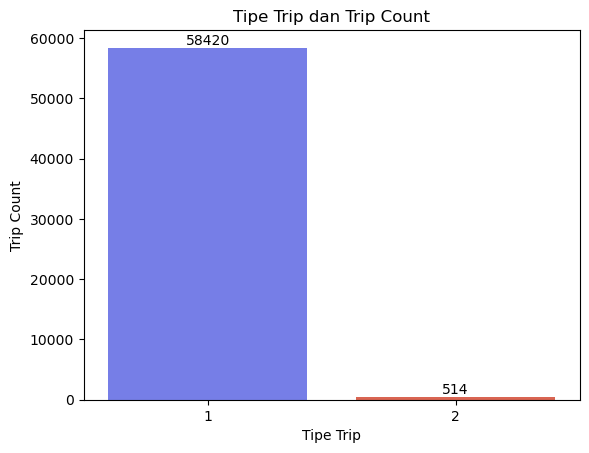

In [1679]:
# Plot bar plot
custom_colors = ['#636efa', '#ef553b', '#00cc96', '#ab63fa']
count_plot = sns.countplot(df, x=df['trip_type'], palette=custom_colors)
# Label value annotate
for i in count_plot.containers:
    count_plot.bar_label(i)

plt.title("Tipe Trip dan Trip Count")
plt.xlabel('Tipe Trip')
plt.ylabel('Trip Count')
plt.show()

| Tipe Trip |
|---|
|1 = Street-hail |
|2 = Dispatch |

In [1680]:
df_pie = df.groupby('trip_type')['total_amount'].count()
df_pie = df_pie.reset_index().sort_values(by='total_amount',ascending=False)
labels = ['Street-hail','Dispatch']
df_pie['label'] = labels
explodes = [0, 0] 
values = df_pie['total_amount']

fig = go.Figure(data=[go.Pie(labels=labels, values=values, pull=explodes)])
fig.update_layout(
    title='Persentase Tipe Payment', title_x= 0.5, 
    hoverlabel=dict(bgcolor="white", font_size=16, font_family="Calibri"),
    height=500, width=500)
fig.update_traces(hoverinfo='label+percent+value', textinfo='label+percent', textfont_size=13, hole=.3)

fig.show()

In [1681]:
df_pie = df.groupby('trip_type')['total_amount'].sum()
df_pie = df_pie.reset_index().sort_values(by='total_amount',ascending=False)
labels = ['Street-hail','Dispatch']
df_pie['label'] = labels
explodes = [0, 0] 
values = df_pie['total_amount']

fig = go.Figure(data=[go.Pie(labels=labels, values=values, pull=explodes)])
fig.update_layout(
    title='Persentase Tipe Payment terhadap Sum Total Bayaran', title_x= 0.5, 
    hoverlabel=dict(bgcolor="white", font_size=16, font_family="Calibri"),
    height=500, width=500)
fig.update_traces(hoverinfo='label+percent+value', textinfo='label+percent', textfont_size=13, hole=.3)

fig.show()

**Insight :** 
1. Tipe trip yang lebih banyak dipilih pelanggan adalah tipe 1, yaitu street-hail yang mencakup 99% total. Tentu dengan melihat terhadap sum total bayar, Dispatch tetap hanya mencakup di sekitar 1%.

**6. Berdasarkan jarak trip: `tip_amount`** 

Kita akan menganalisa kolom  `tip_amount` untuk menjawab beberapa pertanyaan berikut.

1. Berapa banyak pelanggan yang memberi tip ?
2. Apakah hubungan tip dengan total bayar ?
3. Bagaimana tip pada metode pembayaran tertentu ?

In [1682]:
df['tip_label'] = df['tip_amount'].apply(lambda x: 0 if(x==0) else 1)
df_pie = df.groupby('tip_label')['tip_amount'].count()
df_pie = df_pie.reset_index().sort_values(by='tip_amount',ascending=False)
labels = ['Tips','Tidak tips']
df_pie['label'] = labels
explodes = [0, 0] 
values = df_pie['tip_amount']

fig = go.Figure(data=[go.Pie(labels=labels, values=values, pull=explodes)])
fig.update_layout(
    title='Persentase Pelanggan Memberi Tips', title_x= 0.5, 
    hoverlabel=dict(bgcolor="white", font_size=16, font_family="Calibri"),
    height=500, width=500)
fig.update_traces(hoverinfo='label+percent+value', textinfo='label+percent', textfont_size=13, hole=.3)

fig.show()

In [1683]:
fig = px.scatter(df, x='tip_amount', y='total_amount', title='Scatter Plot Tips dan Total Bayaran')
fig.update_layout(
    title_x= 0.5, 
    hoverlabel=dict(bgcolor="white", font_size=16, font_family="Calibri"),
    height=600, width=600)
fig.update_xaxes(title_text='Tips ($)')
fig.update_yaxes(title_text='Total Bayaran ($)')
fig.show()

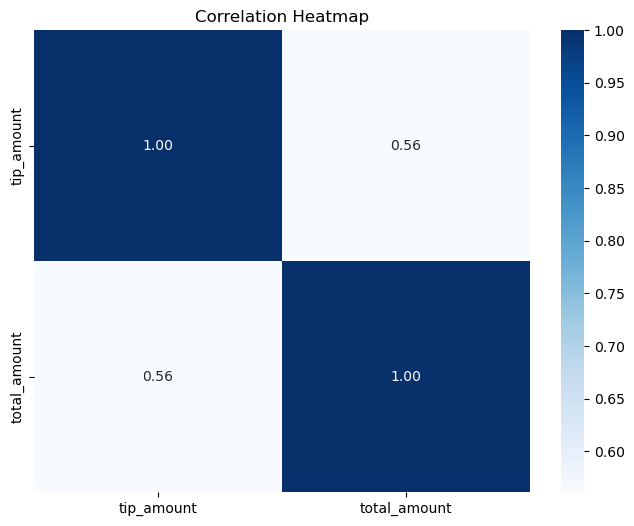

In [1684]:
# Correlation matrix
corr_matrix = df[['tip_amount','total_amount']].corr() 
# Plot heatmap
plt.figure(figsize=(8, 6))  
sns.heatmap(corr_matrix, annot=True, cmap='Blues', fmt=".2f")  
plt.title('Correlation Heatmap')  
plt.show() 

Tidak terlihat terdapat hubungan khusus selain korelasi moderat di nilai 0.56

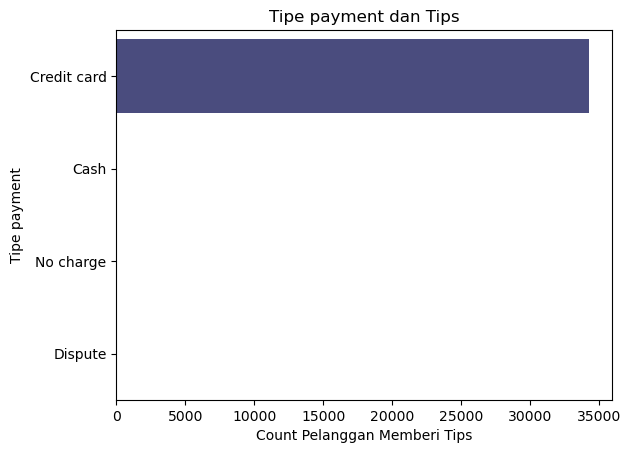

In [1685]:
df_bar = df.groupby('payment_type')['tip_label'].sum()
df_bar = df_bar.reset_index()
df_bar.rename(columns={'tip_label': 'Count Tips'}, inplace=True)
df_bar['label'] = ['Credit card', 'Cash', 'No charge', 'Dispute']
sns.barplot(x=df_bar['Count Tips'], y=df_bar['label'], palette='viridis')

plt.title("Tipe payment dan Tips")
plt.xlabel('Count Pelanggan Memberi Tips')
plt.ylabel('Tipe payment')
plt.show()

Pemberian tips terlihat sesuai dengan aturan pengambilan data, bahwa tips hanya dari kredit yang diinput.

In [1686]:
df_bar.rename(columns={'label': 'Tipe Payment'}, inplace=True)
df_bar[['Count Tips','Tipe Payment']]

Count Tips Tipe Payment
0       34230  Credit card
1           1         Cash
2           0    No charge
3           0      Dispute

Namun, ternyata ada 1 tips cash yang tercatat. Hal ini tidak di-clean karena ada insight yang dapat diperoleh, yaitu adanya machine error atau human error dalam kasus penggantian metode atau tipe payment saat pembayaran.

In [1687]:
df[(df['tip_amount'] > 0 ) & (df['payment_type'] == 2)]

VendorID lpep_pickup_datetime lpep_dropoff_datetime store_and_fwd_flag  \
35132         1  2023-01-19 21:12:51   2023-01-19 21:25:07                  N   

       RatecodeID  PULocationID  DOLocationID  passenger_count  trip_distance  \
35132           1            74           237                1            2.7   

       fare_amount  ...  duration_bin  PUBorough             PUZone  \
35132         15.6  ...        (0, 1]  Manhattan  East Harlem North   

       PUservice_zone  DOBorough                 DOZone  DOservice_zone  \
35132       Boro Zone  Manhattan  Upper East Side South     Yellow Zone   

                     Route  trip_distance_bin  tip_label  
35132  Manhattan-Manhattan             (0, 5]          1  

[1 rows x 42 columns]

**Insight :** 
1. Terdapat 48% atau hampir setengah pelanggan memberi tips.
2. Hanya hubungan korelasi moderat sebesar 0.56.
3. Tips hanya tercatat pada pembayaran secara kredit. Namun, ada 1 entri secara cash yang merupakan human error atau machine error.

## Pola Trip : Geospatial, Waktu, Rute

**1. Berdasarkan Borough** 

Kita akan menganalisa pengaruh fitur Geospatial Borough yang terdapat pada kolom `PUBorough` terhadap banyaknya trip dan total bayaran untuk menjawab beberapa pertanyaan berikut.
Tempat pickup menjadi titik tinjau karena dapat berarti titik permintaan dari pelanggan untuk pesanan atau panggilan taxi, sehingga dapat mewakili trip. 

1. Apakah tempat pickup berpengaruh besar pada pendapatan ditinjau dari total bayaran ?



In [1688]:
df_borough = df.groupby('PUBorough')['total_amount'].agg(['median'])
df_borough = df_borough.reset_index()
df_borough = df_borough.sort_values(by='median', ascending=False)
df_borough = df_borough.reset_index(drop=True)

In [1689]:
df_borough

PUBorough  median
0  Outside of NYC   58.90
1        Brooklyn   20.46
2         Unknown   18.85
3       Manhattan   17.10
4          Queens   17.10
5   Staten Island   16.56
6           Bronx   16.40

In [1690]:
trace = go.Bar(
    y=df_borough[df_borough['PUBorough']!='Outside of NYC']['PUBorough'],
    x=df_borough[df_borough['PUBorough']!='Outside of NYC']['median'],
    orientation='h',  
    textfont_size=13, 
)

layout = go.Layout(
    title='Horizontal Bar Graph Borough dan Median',
    xaxis=dict(title='Value'),
    yaxis=dict(title='Category'),
)

fig = go.Figure(data=[trace], layout=layout)

fig.update_layout(
    title_x= 0.5, 
    hoverlabel=dict(bgcolor="white", font_size=16, font_family="Calibri"),
    height=500, width=600,
    )
fig.update_traces(textfont_size=13)


fig.show()

Jika dilihat median total bayaran, memang Outside of NYC membuat terlihat berbeda, namun jika kita exclude karena memang outside of NYC akan terdiri dari trip antar Borough yang pastinya akan lebih mahal. Maka kita tes kruskal-wallis untuk melihat apakah data sebenarnya signifikan berbeda. Untuk catatan unknown dapat terjadi karena data tile map tidak medapatkan match koordinat gps pada saat data masuk yang tidak menutup kemungkinan posisi masih di dalam NYC terutama karena ada label Outside of NYC oleh vendor.

In [1691]:
from scipy.stats import kruskal

bronx = df.loc[df['PUBorough'] == 'Bronx', 'total_amount']
brooklyn = df.loc[df['PUBorough'] == 'Brooklyn', 'total_amount']
manhattan = df.loc[df['PUBorough'] == 'Manhattan', 'total_amount']
queens = df.loc[df['PUBorough'] == 'Queens', 'total_amount']
staten_island = df.loc[df['PUBorough'] == 'Staten Island', 'total_amount']
unknown = df.loc[df['PUBorough'] == 'Unknown', 'total_amount']

statistic, p_value = kruskal(bronx, brooklyn, manhattan, queens, staten_island, unknown)

print("Ho : Tidak ada perbedaan nilai Total Bayaran yang signifikan berdasarkan Borough di dalam NYC")
print("Ha : Ada perbedaan nilai Total Bayaran yang signifikan berdasarkan Borough di dalam NYC\n")
print("Kruskal-Wallis Test Statistic:", statistic)
print("P-value:", p_value)
print("\nP-value < 0.05, Maka Ho di tolak yang berarti ada perbedaan yang signifikan secara statistik")

Ho : Tidak ada perbedaan nilai Total Bayaran yang signifikan berdasarkan Borough di dalam NYC
Ha : Ada perbedaan nilai Total Bayaran yang signifikan berdasarkan Borough di dalam NYC

Kruskal-Wallis Test Statistic: 646.1760474620745
P-value: 2.1233126522066584e-137

P-value < 0.05, Maka Ho di tolak yang berarti ada perbedaan yang signifikan secara statistik


**Insight :** 
1. Tempat pickup berpengaruh besar pada pendapatan ditinjau dari rata-rata total bayaran.

**2. Berdasarkan Waktu** 

Kita akan menganalisa pengaruh waktu lewat berbagai fitur waktu seperti datetime pada kolom `lpep_pickup_datetime` dan kolom pecahannya terhadap banyaknya trip dan total bayaran untuk menjawab beberapa pertanyaan berikut.

1. Apakah waktu berpengaruh besar pada banyak trip ?
2. Apakah waktu berpengaruh besar pada pendapatan ditinjau dari total bayaran ?

Pickup time dipilih karena merupakan waktu mulai dan dapat diimplikasikan bahwa itu adalah waktu order pelanggan

Rentang waktu adalah Desember 2022 - Februari 2023

In [1692]:
df['lpep_pickup_datetime'].describe().loc[['min','max']]

min    2022-12-09 14:55:42
max    2023-02-01 03:10:05
Name: lpep_pickup_datetime, dtype: object

Mari kita lihat pengaruh waktu terhadap banyak trip

In [1693]:
df['lpep_pickup_date']=df['lpep_pickup_datetime'].dt.date
df_time_date = df.groupby('lpep_pickup_date')['total_amount'].count()
df_time_date = df_time_date.reset_index()
df_time_date['lpep_pickup_date'] =  pd.to_datetime(df_time_date['lpep_pickup_date'])

In [1694]:
trace = go.Scatter(x=df_time_date['lpep_pickup_date'], y=df_time_date['total_amount'], mode='lines', marker=dict(color='blue'))
fig = go.Figure(trace)
fig.update_layout(
    title='Line Plot Trip Count Desember 2022 - Februari 2023', title_x= 0.5, 
    hoverlabel=dict(bgcolor="white", font_size=16, font_family="Calibri"),
    height=500, width=600,
    xaxis_title='Tanggal',
    yaxis_title='Count Trip')
fig.update_traces(textfont_size=13)
fig.show()

Setelah melihat detil tanggal terhadap pola didapat melalui hover plotly, bahwa pola yang dapat kita ambil adalah dalam rentang januari tanggal 1 sampai 31 tahun 2023.

In [1695]:
fig.update_xaxes(range=['2023-01-01', '2023-01-31'])

Terdapat pola silkik mingguan pada bulan Januari 2023, dengan trend naik sedikit sampai mendekati akhir bulan tepatnya tanggal 25 di puncak maksimum yang menandakan trip umumnya siklik per minggu dan ada peningkatan sedikit menuju akhir bulan, yang mungkin dapat dikaitkan dengan faktor lain seperti aktivitas lalu lintas atau kesibukan penduduk.

In [1696]:
df_time_week = df.groupby('lpep_pickup_day_of_week')['total_amount'].count()
df_time_week = df_time_week.reset_index()

trace = go.Scatter(x=df_time_week['lpep_pickup_day_of_week'], y=df_time_week['total_amount'], mode='lines', marker=dict(color='blue'))
fig = go.Figure(trace)
new_labels = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday','Sunday'] # Monday = 0 in pandas dt
fig.update_layout(
    title='Line Plot Trip Count Hari dalam Seminggu', title_x= 0.5, 
    hoverlabel=dict(bgcolor="white", font_size=16, font_family="Calibri"),
    height=500, width=600,
    xaxis=dict(
        tickvals=df_time_week['lpep_pickup_day_of_week'],
        ticktext=new_labels,
        title='Jam'
    ),
    yaxis_title='Count Trip')
fig.update_traces(textfont_size=13)
fig.show()

Banyaknya trip dalam hari-hari dalam seminggu memiliki maksimum pada hari selasa dan cenderung menurun menuju sampai hari minggu. Hal ini dapat disebabkan oleh tingginya aktivitas pada awal minggu namun karena senin adalah peralihan maka tidak begitu tinggi yang kemudian berangsur turun sampai weekend di mana orang kebanyakan istirahat atau menggunakan mobil pribadi. Perlu penggalian dan analisa lebih dalam untuk konfirmasi penyebab ini dengan data aktivitas lalu lintas atau penduduk secara umum maupun khusus populasi pelanggan taxi.

In [1697]:
def flag_hour(row):
    if (row['lpep_pickup_hour'] > 6) & (row['lpep_pickup_hour'] <= 12) :
        return 'Morning'
    elif(row['lpep_pickup_hour'] > 12) & (row['lpep_pickup_hour'] <= 18) :
        return 'Afternoon'
    elif(row['lpep_pickup_hour'] > 18) & (row['lpep_pickup_hour'] <= 21) :
        return 'Evening'
    elif(((row['lpep_pickup_hour'] > 21) & (row['lpep_pickup_hour'] <= 24)) | ((row['lpep_pickup_hour'] >= 0) & (row['lpep_pickup_hour'] <= 3) )):
        return 'Night'
    elif(row['lpep_pickup_hour'] > 3) & (row['lpep_pickup_hour'] <= 6) :
        return 'Dawn'

df['flag_hour'] = df.apply(lambda row: flag_hour(row), axis=1)


In [1698]:
df['flag_hour'].unique()

array(['Night', 'Dawn', 'Morning', 'Afternoon', 'Evening'], dtype=object)

Pastikan tidak ada NaN dan sesuai label

In [1699]:
df_time_hour = df.groupby('lpep_pickup_hour')['total_amount'].count()
df_time_hour = df_time_hour.reset_index()

trace = go.Scatter(x=df_time_hour['lpep_pickup_hour'], y=df_time_hour['total_amount'], mode='lines', marker=dict(color='blue'))
fig = go.Figure(trace)
fig.update_layout(
    title='Line Plot Trip Count Jam', title_x= 0.5, 
    hoverlabel=dict(bgcolor="white", font_size=16, font_family="Calibri"),
    height=500, width=600,
    xaxis_title='Jam',
    yaxis_title='Count Trip')
fig.update_traces(textfont_size=13)
fig.show()

Pola siklik ada pada jam karena memang waktu jam adalah siklus. Trip paling banyak ada di jam 15-18, yang masih masuk ke interval jam siang atau Afternoon.

Sekarang kita lihat pengaruh waktu terhadap total bayaran

In [1700]:
df_time_date = df.groupby('lpep_pickup_date')['total_amount'].sum()
df_time_date = df_time_date.reset_index()
df_time_date['lpep_pickup_date'] =  pd.to_datetime(df_time_date['lpep_pickup_date'])

trace = go.Scatter(x=df_time_date['lpep_pickup_date'], y=df_time_date['total_amount'], mode='lines', marker=dict(color='blue'))
fig = go.Figure(trace)
fig.update_layout(
    title='Line Plot Sum Total Bayaran Desember 2022 - Februari 2023', title_x= 0.5, 
    hoverlabel=dict(bgcolor="white", font_size=16, font_family="Calibri"),
    height=500, width=600,
    xaxis_title='Tanggal',
    yaxis_title='Sum Total Bayaran ($)')
fig.update_traces(textfont_size=13)
fig.show()

In [1701]:
fig.update_xaxes(range=['2023-01-01', '2023-01-31'])

In [1702]:
df_time_week = df.groupby('lpep_pickup_day_of_week')['total_amount'].sum()
df_time_week = df_time_week.reset_index()

trace = go.Scatter(x=df_time_week['lpep_pickup_day_of_week'], y=df_time_week['total_amount'], mode='lines', marker=dict(color='blue'))
fig = go.Figure(trace)
new_labels = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday','Sunday'] # Monday = 0 in pandas dt
fig.update_layout(
    title='Line Plot Sum Total Bayaran Hari dalam Seminggu', title_x= 0.5, 
    hoverlabel=dict(bgcolor="white", font_size=16, font_family="Calibri"),
    height=500, width=600,
    xaxis=dict(
        tickvals=df_time_week['lpep_pickup_day_of_week'],
        ticktext=new_labels,
        title='Jam'
    ),
    yaxis_title='Sum Total Bayaran ($)')
fig.update_traces(textfont_size=13)
fig.show()

In [1703]:
df_time_hour = df.groupby('lpep_pickup_hour')['total_amount'].sum()
df_time_hour = df_time_hour.reset_index()

trace = go.Scatter(x=df_time_hour['lpep_pickup_hour'], y=df_time_hour['total_amount'], mode='lines', marker=dict(color='blue'))
fig = go.Figure(trace)
fig.update_layout(
    title='Line Plot Sum Total Bayaran dan Jam', title_x= 0.5, 
    hoverlabel=dict(bgcolor="white", font_size=16, font_family="Calibri"),
    height=500, width=600,
    xaxis_title='Jam',
    yaxis_title='Sum Total Bayaran ($)')
fig.update_traces(textfont_size=13)
fig.show()

**Insight :** 
1. Waktu berpengaruh besar pada banyak trip dengan pola siklik mingguan sepanjang bulan Januari 2023, pola hari dalam minggu adalah menurun dengan minimum pada weekend, dan untuk pola jam harian memiliki maksimum di jam 15-18.
2. Waktu berpengaruh besar pada pendapatan ditinjau dari total bayaran dengan pola serupa dengan pola banyak trip untuk fungsi agregat sum. Sum dipilih untuk mewakili total pendapatan pada kurun waktu tersebut.

**3. Berdasarkan Rute** 

Kita akan melanjutkan analisa rute yang telah dilakukan pada bagian pola perilaku customer yang merupakan sudut pandang preferensi pilihan rute pelanggan. Sekarang, kita akan melihat rute tertentu terhadap banyaknya trip dan total bayaran namun lewat perspektif fitur geospatial dan waktu untuk menjawab beberapa pertanyaan berikut.

1. Apakah rute paling populer sama dengan analisa RFM sebelumnya ?
2. Apakah rute inner Borough memang lebih signifikan atau hanya terlihat seperti itu pada kota ramai ?
3. Apakah ada waktu yang paling sibuk untuk rute paling populer tersebut ?

Sekarang kita menggunakan cross tabulasi untuk melihat lebih jelas bagaimana pasangan kota yang merupakan rute dari dan ke kota tertentu.

In [1704]:
crosstab_PU_DO = pd.crosstab(df['PUBorough'], df['DOBorough'], margins=True, margins_name='Total Rute')
display(crosstab_PU_DO)

DOBorough       Bronx  Brooklyn  EWR  Manhattan  Outside of NYC  Queens  \
PUBorough                                                                 
Bronx             344         0    0        147               5      12   
Brooklyn            7      5467    7       1192               7     257   
Manhattan        1250       178    7      33891              34     662   
Outside of NYC      0         0    1          0               4      12   
Queens             30       391    2        740              85   14130   
Staten Island       0         1    0          0               0       0   
Unknown             0         1    0          0               0       2   
Total Rute       1631      6038   17      35970             135   15075   

DOBorough       Staten Island  Unknown  Total Rute  
PUBorough                                           
Bronx                       0        1         509  
Brooklyn                    0        6        6943  
Manhattan                   0       18       36040  
Outside of NYC              0        1          18  
Queens                      0       21       15399  
Staten Island               8        0           9  
Unknown                     0       13          16  
Total Rute                  8       60       58934

Text(0.5, 1.0, 'Heatmap Crosstabulation Rute')

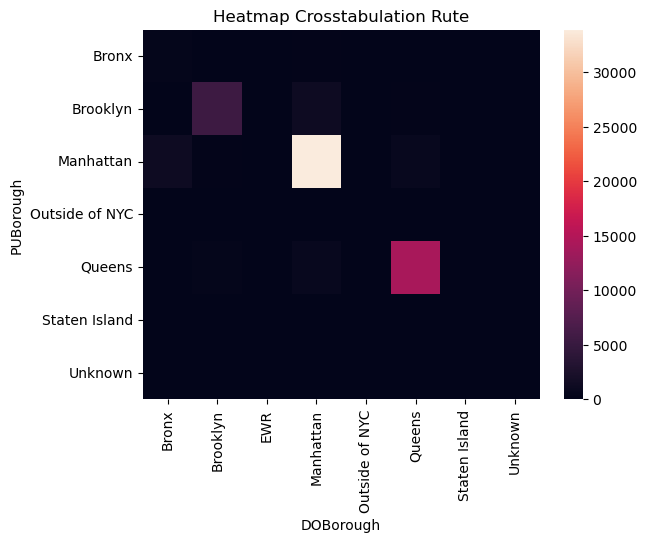

In [1705]:
crosstab_PU_DO_heat = pd.crosstab(df['PUBorough'], df['DOBorough'])
sns.heatmap(data=crosstab_PU_DO_heat)
plt.title('Heatmap Crosstabulation Rute')

Dengan melihat heatmap dan cross tabulasi kita dapat konfirmasi hasil RFM kita, bahwa memang Manhattan-Manhattan adalah rute yang paling banyak, diikuti dengan Brooklyn-Brooklyn dan Queens-Queens.

In [1706]:
def flag_inner(row):
    if row['PUBorough']==row['DOBorough']:
        return 1
    else:
        return 0

df['flag_inner'] = df.apply(lambda row: flag_inner(row), axis=1)

In [1707]:
df_pie = df.groupby('flag_inner')['Route'].count()
df_pie = df_pie.reset_index().sort_values(by='Route',ascending=False)
labels = ['Rute Inner Borough','Rute Antar Borough']
df_pie['label'] = labels
explodes = [0, 0] 
values = df_pie['Route']

fig = go.Figure(data=[go.Pie(labels=labels, values=values, pull=explodes)])
fig.update_layout(
    title='Persentase Rute Inner atau Antar Borough', title_x= 0.5, 
    hoverlabel=dict(bgcolor="white", font_size=16, font_family="Calibri"),
    height=500, width=500)
fig.update_traces(hoverinfo='label+percent+value', textinfo='percent', textfont_size=13, hole=.3)

fig.show()

In [1708]:
df_pie = df.groupby('flag_inner')['total_amount'].sum()
df_pie = df_pie.reset_index().sort_values(by='total_amount',ascending=False)
labels = ['Rute Inner Borough','Rute Antar Borough']
df_pie['label'] = labels
explodes = [0, 0] 
values = df_pie['total_amount']

fig = go.Figure(data=[go.Pie(labels=labels, values=values, pull=explodes)])
fig.update_layout(
    title='Persentase Rute Inner atau Antar Borough Berdasar Total Bayaran', title_x= 0.5, 
    hoverlabel=dict(bgcolor="white", font_size=16, font_family="Calibri"),
    height=500, width=600)
fig.update_traces(hoverinfo='label+percent+value', textinfo='percent', textfont_size=13, hole=.3)

fig.show()

Terlihat memang baik dari segi banyaknya maupun total bayaran, rute didominasi yang inner Borough. 

In [1709]:
df_route = df.groupby('Route')['total_amount'].count()
df_route = df_route.reset_index()
df_route = df_route.sort_values(by='total_amount', ascending=False).head(3)
display(df_route)

Route  total_amount
15  Manhattan-Manhattan         33891
28        Queens-Queens         14130
6     Brooklyn-Brooklyn          5467

In [1710]:
df_route_hour = df.groupby(['Route','flag_hour'])['total_amount'].count()
df_route_hour = df_route_hour.reset_index()

df_route_hour = df_route_hour[df_route_hour['Route'].isin(list(df_route['Route']))]

In [1711]:
df_route_hour.head(10)

Route  flag_hour  total_amount
23    Brooklyn-Brooklyn  Afternoon          2551
24    Brooklyn-Brooklyn       Dawn            71
25    Brooklyn-Brooklyn    Evening          1216
26    Brooklyn-Brooklyn    Morning           934
27    Brooklyn-Brooklyn      Night           695
59  Manhattan-Manhattan  Afternoon         15016
60  Manhattan-Manhattan       Dawn           737
61  Manhattan-Manhattan    Evening          4252
62  Manhattan-Manhattan    Morning         12220
63  Manhattan-Manhattan      Night          1666

In [1712]:
fig = px.sunburst(df_route_hour, path=['Route', 'flag_hour'], values='total_amount', 
                  color_discrete_sequence=px.colors.qualitative.G10)
fig.update_layout(
    title='Suburst Rute dan Label Waktu Harian Berdasar Count Trip', title_x= 0.5, 
    hoverlabel=dict(bgcolor="white", font_size=16, font_family="Calibri"),
    height=700, width=700)
fig.update_traces(textfont_size=13)
fig.show()

In [1713]:
df_route = df.groupby('Route')['total_amount'].sum()
df_route = df_route.reset_index()
df_route = df_route.sort_values(by='total_amount', ascending=False).head(3)
display(df_route)

Route  total_amount
15  Manhattan-Manhattan     640085.87
28        Queens-Queens     269718.16
6     Brooklyn-Brooklyn     110515.51

In [1714]:
df_route_hour = df.groupby(['Route','flag_hour'])['total_amount'].sum()
df_route_hour = df_route_hour.reset_index()

df_route_hour = df_route_hour[df_route_hour['Route'].isin(list(df_route['Route']))]

In [1715]:
df_route_hour.head(10)

Route  flag_hour  total_amount
23    Brooklyn-Brooklyn  Afternoon      52779.61
24    Brooklyn-Brooklyn       Dawn       1858.92
25    Brooklyn-Brooklyn    Evening      23919.96
26    Brooklyn-Brooklyn    Morning      18344.68
27    Brooklyn-Brooklyn      Night      13612.34
59  Manhattan-Manhattan  Afternoon     295421.20
60  Manhattan-Manhattan       Dawn      11802.81
61  Manhattan-Manhattan    Evening      80792.59
62  Manhattan-Manhattan    Morning     222078.59
63  Manhattan-Manhattan      Night      29990.68

In [1716]:
fig = px.sunburst(df_route_hour, path=['Route', 'flag_hour'], values='total_amount', 
                  color_discrete_sequence=px.colors.qualitative.G10)
fig.update_layout(
    title='Suburst Rute dan Label Waktu Harian Berdasar Sum Total Bayaran', title_x= 0.5, 
    hoverlabel=dict(bgcolor="white", font_size=16, font_family="Calibri"),
    height=700, width=700)
fig.update_traces(textfont_size=13)
fig.show()

Kedua sunburst rute populer menunjukkan proporsi yang serupa untuk ketiga rute populer dengan perbedaan sedikit untuk posisi kedua dan ketiga paling ramai.

**Insight :** 
1. Rute paling populer sesuai dengan analisa RFM preferensi rute pelanggan.
2. Rute inner Borough memang lebih signifikan ditinjau secara count trip ataupun total bayaran dengan persentase 91% count trip dan 83% dari sum total bayaran.
3. Ditemukan waktu yang paling sibuk untuk rute paling populer adalah Afternoon (jam 12-18). Posisi kedua rute adalah Morning (jam 6-12) dan  Evening (jam 18-21) tergantung rute, namun perbedaan antara kedua dan ketiga paling sibuk tidak banyak.

# E. Kesimpulan dan Rekomendasi 
1. Karakteristik pola perilaku pelanggan :
    * Sudah ada hampir 50% rute customer loyal dan best. Namun, hal sebaliknya juga benar bahwa terdapat setengah lagi potensi segmen market yang bisa dimanfaatkan jika ditinjau dengan rute pilihan pelanggan penumpang. Hal ini menjelaskan preferensi pelanggan terhadap rute populer yang kemungkinan besar potential customer akan pilih.
    * Tiga Rute paling populer pilihan customer, Manhattan-Manhattan, Queens-Queens, dan Brooklyn-Brooklyn mengindikasi bahwa customer punya preferensi untuk memilih rute inner Borough di ketiga kota besar NYC. Tentu jika kita cocokkan pada data sensus NYC, terlihat bahwa proporsi paling besar adalah Queens, Brooklyn, dan Manhattan. Namun, jika kita melihat density seperti pada tabel yang telah disusun Wikipedia dari berbagai data sensus, maka terlihat jelas Manhattan adalah yang terpadat dan didukung kontribusi GDP sangat besar. Hal tersebut punya makna aktivitas kota yang tinggi dan rute populer transportation service tentu akan mengikuti.
    * Interval jarak dan durasi yang memiliki paling banyak pelanggan trip adalah 0 - 1 jam dan 0 - 5 mil. Artinya pelanggan memiliki preferensi trip pendek dan cepat.
    * Hubungan jarak dan durasi terhadap  **Total Bayaran** adalah berbanding lurus. Jika ditinjau melalui korelasi, terlihat bahwa korelasi tinggi positif di atas 0.80 untuk keduanya terhadap **Total Bayaran**. Namun, karena count sedikit untuk interval trip panjang kemungkinan walaupun segi pendapatan tinggi, tapi dengan frekuensi yang sedikit akan cenderung lebih tidak stabil dalam pendapatan sepanjang waktu berlalu.
    * Jumlah trip sangat didominasi oleh penumpang tunggal, yang kemudian walaupun terdapat perbedaan cukup jauh diikuti oleh penumpang berdua. Hal ini berarti, penumpang lebih memilih untuk pergi dengan grup kecil di bawah 2.
    * Tambahan : Terdapat jumlah penumpang nol yang telah dibahas sekilas pada saat cleaning. Di sini kembali kita lihat dengan jumlah kedua terkecil, namun tetap ada di ratusan. Angka ini dapat dijelaskan oleh kesalahan input atau anomali praktik driver dan penumpang.
    * Metode pembayaran yang paling signifikan menurut banyak trip adalah Credit 63.9% dan Cash 35.8%. Hal ini juga berarti secara tersirat bahwa pembayaran tidak banyak terjadi masalah seperti terlihat pada tipe payment 3 sampai 6, di mana opsi 3 dan 4 tidak mencapai 1% dan metode pembayaran 5 dan 6 tidak ada sama sekali.
    * Tipe trip yang lebih banyak dipilih pelanggan adalah tipe 1, yaitu street-hail yang mencakup 99% total. Tentu dengan melihat terhadap sum total bayar, Dispatch tetap hanya mencakup di sekitar 1%.
    * Terdapat 48% atau hampir setengah pelanggan memberi tips.
    * Hanya hubungan korelasi moderat sebesar 0.56.
    * Tips hanya tercatat pada pembayaran secara kredit. Namun, ada 1 entri secara cash yang merupakan human error atau machine error.

2. Karakteristik pola trip pada waktu, tempat, maupun rute :
    * Tempat pickup berpengaruh besar pada pendapatan ditinjau dari rata-rata total bayaran.
    * Waktu berpengaruh besar pada banyak trip dengan pola siklik mingguan sepanjang bulan Januari 2023, pola hari dalam minggu adalah menurun dengan minimum pada weekend, dan untuk pola jam harian memiliki maksimum di jam 15-18.
    * Waktu berpengaruh besar pada pendapatan ditinjau dari total bayaran dengan pola serupa dengan pola banyak trip untuk fungsi agregat sum. Sum dipilih untuk mewakili total pendapatan pada kurun waktu tersebut.
    * Rute paling populer sesuai dengan analisa RFM preferensi rute pelanggan.
    * Rute inner Borough memang lebih signifikan ditinjau secara count trip ataupun total bayaran dengan persentase 91% count trip dan 83% dari sum total bayaran.
    * Ditemukan waktu yang paling sibuk untuk rute paling populer adalah Afternoon (jam 12-18). Posisi kedua rute adalah Morning (jam 6-12) dan  Evening (jam 18-21) tergantung rute, namun perbedaan antara kedua dan ketiga paling sibuk tidak banyak.


## Rekomendasi
1. Strategi marketing yang cocok untuk mengoptimasi pendapatan transportation service New York mempertimbangkan pola perilaku pelanggan :
    1. **Memanfaatkan Preferensi Pelanggan terhadap Rute Populer**: Mengingat preferensi pelanggan terhadap rute populer seperti Manhattan-Manhattan, Queens-Queens, dan Brooklyn-Brooklyn, strategi pemasaran dapat difokuskan pada promosi yang menargetkan pelanggan dalam rute-rute ini. Kampanye iklan yang menyoroti keunggulan layanan di wilayah-wilayah ini dapat menarik lebih banyak pelanggan potensial.
    2. **Memperluas Penawaran untuk Trip Pendek dan Cepat**: Karena banyak pelanggan memiliki preferensi untuk trip pendek dan cepat, memperluas penawaran untuk layanan sejenis seperti layanan jarak dekat dengan tarif yang kompetitif bisa menjadi strategi yang efektif. Ini bisa meliputi penawaran spesial untuk trip pendek, paket langganan untuk perjalanan rutin sehari-hari, atau promosi untuk mendorong penggunaan layanan untuk perjalanan sehari-hari.
    3. **Mendorong Penggunaan Metode Pembayaran Tertentu**: Mengingat bahwa sebagian besar pembayaran dilakukan melalui kartu kredit, dapat dipertimbangkan untuk memberikan insentif khusus untuk pembayaran dengan kartu kredit. Ini bisa berupa diskon atau bonus poin setiap kali pelanggan menggunakan kartu kredit untuk pembayaran, sehingga mendorong penggunaan metode pembayaran yang lebih menguntungkan bagi NYC TLC.
    4. **Optimalkan Layanan Tipe 1 (Street-hail)**: Dengan mayoritas pelanggan memilih tipe trip 1 (street-hail), fokuskan upaya pemasaran dan promosi pada meningkatkan penggunaan layanan ini. Ini bisa melalui kampanye iklan yang menekankan kenyamanan dan keamanan dalam menangkap taksi di jalanan, serta penyediaan fitur tambahan seperti estimasi waktu tunggu yang akurat dan pembaruan status perjalanan secara real-time.
    5. **Mendorong Tip dari Pelanggan**: Dengan hampir setengah dari pelanggan memberikan tip, NYC TLC dapat mengembangkan program insentif untuk mendorong pelanggan memberikan tip. Ini bisa berupa promosi untuk memberikan tip kepada pengemudi setelah setiap perjalanan, atau memberikan insentif seperti diskon untuk perjalanan berikutnya bagi pelanggan yang memberikan tip secara konsisten.
    6. **Peningkatan Kualitas Layanan**: Mengingat hubungan korelasi moderat antara berbagai faktor seperti jarak, durasi, dan total bayaran, penting untuk memastikan kualitas layanan tetap tinggi. Peningkatan kualitas layanan dapat mencakup peningkatan dalam pengalaman pelanggan, pembaruan armada kendaraan, serta pelatihan yang lebih baik bagi pengemudi dalam hal keamanan dan keramahan.
    7. **Analisis dan Penanganan Anomali**: Penting untuk melakukan analisis lebih lanjut terhadap entri yang menunjukkan anomali, seperti jumlah penumpang nol atau entri pembayaran tunai yang mungkin merupakan kesalahan manusia atau mesin. Dengan mengidentifikasi dan menangani anomali-anomali ini, NYC TLC dapat meningkatkan akurasi data dan memastikan bahwa pengambilan keputusan didasarkan pada informasi yang tepat.
    8. **Inovasi dalam Layanan**: Untuk mengakomodasi preferensi pelanggan terhadap perjalanan pendek dan cepat, serta rute-rute populer di dalam Borough, NYC TLC dapat mengembangkan inovasi layanan seperti layanan ridesharing atau layanan jemputan yang terprogram secara efisien. Inovasi semacam ini dapat membuka peluang baru untuk menjangkau segmen pasar yang lebih luas dan meningkatkan total bayaran.
    9. **Kemitraan dan Integrasi**: Menjalin kemitraan dengan bisnis atau institusi di sekitar rute-rute populer dapat menjadi strategi yang efektif untuk meningkatkan penggunaan layanan transportasi. Misalnya, NYC TLC dapat berkolaborasi dengan hotel, restoran, atau tempat-tempat wisata untuk menawarkan paket promosi atau diskon bagi pelanggan yang menggunakan layanan transportasi mereka.
    10. **Analisis Data Lanjutan**: Selain menggunakan korelasi dan statistik sederhana, NYC TLC dapat memanfaatkan analisis data lanjutan dan teknik machine learning untuk mendapatkan wawasan yang lebih dalam tentang perilaku pelanggan dan faktor-faktor yang mempengaruhi total bayaran. Dengan memahami pola-pola kompleks ini, NYC TLC dapat mengoptimalkan strategi pemasaran dan operasionalnya dengan lebih efektif.

2. Strategi operasional logistik dalam mengatasi kesediaan armada pada waktu, tempat, maupun rute populer :
    1. **Optimalkan Posisi Armada pada Tempat Pickup yang Berpengaruh Besar**: Mengingat bahwa tempat pickup memiliki pengaruh besar pada pendapatan, NYC TLC dapat menggunakan analisis data untuk menentukan lokasi-lokasi yang paling menguntungkan. Dengan mengalokasikan armada lebih banyak di tempat-tempat ini pada waktu-waktu yang strategis, seperti saat permintaan tinggi atau dalam rangka mengantisipasi pola perilaku pelanggan, NYC TLC dapat memaksimalkan peluang untuk meningkatkan pendapatannya.
    2. **Penjadwalan Armada Berdasarkan Pola Waktu yang Signifikan**: Memahami pola siklik mingguan dan harian dari waktu berpengaruh besar pada banyak trip dan pendapatan dapat membantu dalam penjadwalan armada. NYC TLC dapat mengatur jadwal armada untuk menyesuaikan dengan pola ini, dengan meningkatkan ketersediaan armada pada jam-jam yang diprediksi memiliki permintaan tinggi, seperti jam 15-18 pada hari-hari tertentu dalam seminggu.
    3. **Optimalkan Pelayanan pada Waktu-waktu Paling Sibuk**: Dengan mengetahui bahwa waktu yang paling sibuk untuk rute paling populer adalah pada siang hari, NYC TLC dapat mengalokasikan lebih banyak armada atau mengatur sistem prioritas untuk memastikan bahwa layanan tersedia secara optimal selama periode ini. Hal ini dapat melibatkan strategi seperti penugasan armada tambahan pada jam-jam sibuk atau penawaran insentif bagi pengemudi untuk bekerja pada waktu-waktu tersebut.
    4. **Pengembangan Rute dan Penyesuaian Operasional**: Berdasarkan analisis RFM dan preferensi rute pelanggan, NYC TLC dapat mempertimbangkan untuk mengoptimalkan rute-rute yang paling populer atau menyesuaikan operasionalnya untuk lebih menjangkau pelanggan potensial. Ini bisa meliputi pengembangan rute-rute alternatif atau penyesuaian jadwal armada untuk mencakup area-area yang memiliki permintaan tinggi namun belum terlayani secara optimal.

Dengan menggabungkan rekomendasi-rekomendasi ini dan terus memantau perubahan dalam perilaku pelanggan serta dinamika pasar, NYC TLC dapat mengembangkan strategi pemasaran yang kokoh untuk mengoptimalkan pendapatan transportasi di New York City.
